<a href="https://colab.research.google.com/github/shoofiash/BootcampTask/blob/main/Tugas_Time_Series_Analysis_%26_Forecasting_Yasmin_Shofiyyah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# utilities packages
import datetime

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot

#for evaluating CV results
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# Time Series Analysis - Basic

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/bootcamp/time_series_analysis_task/task_1_1.csv")
data2 = pd.read_csv("/content/drive/MyDrive/bootcamp/time_series_analysis_task/task_1_2.csv")
data3 = pd.read_csv("/content/drive/MyDrive/bootcamp/time_series_analysis_task/task_1_3.csv")
data4 = pd.read_csv("/content/drive/MyDrive/bootcamp/time_series_analysis_task/task_1_4.csv")
data5 = pd.read_csv("/content/drive/MyDrive/bootcamp/time_series_analysis_task/task_1_5.csv")
data6 = pd.read_csv("/content/drive/MyDrive/bootcamp/time_series_analysis_task/task_1_6.csv")
data7 = pd.read_csv("/content/drive/MyDrive/bootcamp/time_series_analysis_task/task_1_7.csv")
data8 = pd.read_csv("/content/drive/MyDrive/bootcamp/time_series_analysis_task/task_1_8.csv")
data9 = pd.read_csv("/content/drive/MyDrive/bootcamp/time_series_analysis_task/task_1_9.csv")
data10 = pd.read_csv("/content/drive/MyDrive/bootcamp/time_series_analysis_task/task_1_10.csv")

## **DATA 1**

In [ ]:
# load dataset 1
data1

,index,value
0,101,1.323913
1,102,1.197747
2,103,-0.951691
3,104,1.904784
4,105,-0.551699
...,...,...
95,196,1.110444
96,197,0.521014
97,198,0.670843
98,199,1.965832


In [ ]:
# check data structure
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


- Pada data 1, tidak terdapat nilai null baik pada kolom value maupun index
- Data 1 terdiri dari dari 100 baris serta dua kolom

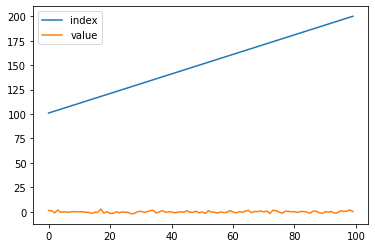

In [ ]:
# plot data 1
data1.plot()

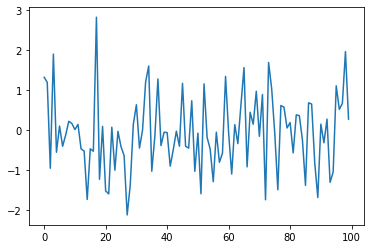

In [ ]:
data1["value"].plot()

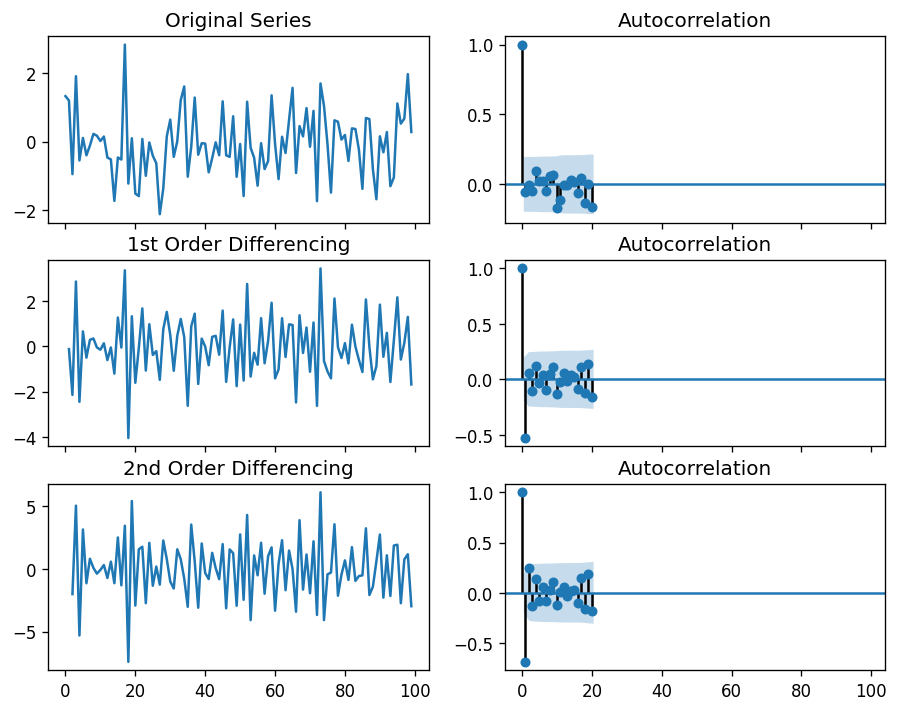

In [ ]:
# LOOKING FOR d

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data1.value); axes[0, 0].set_title('Original Series')
plot_acf(data1.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data1.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data1.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data1.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data1.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Diagram diatas dapat dilihat bahwa data sudah stasioner serta tidak perlu dilakukan differencing. Hal ini dapat dilihat pada differencing 1, hasil significant lag autocorrelation sangat negatif yang berarti data terlalu banyak dilakukan differencing. Sehingga, nilai d=0

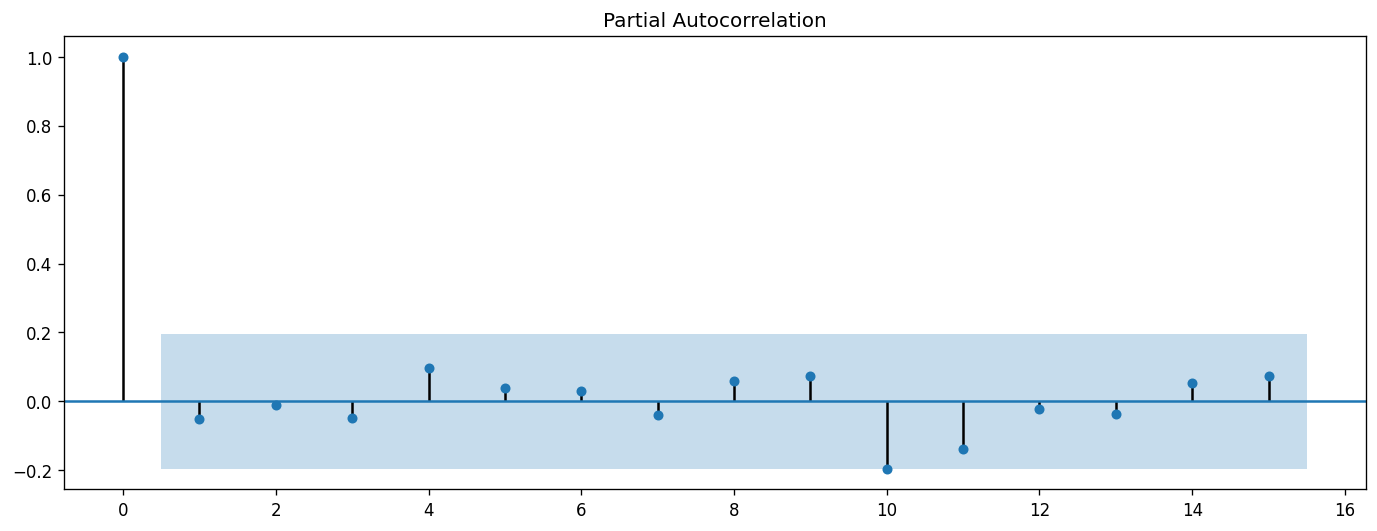

In [ ]:
# LOOKING FOR AR term (p)
plot_pacf(
    data1["value"],
    lags = 15
).set_size_inches((14,5));

Tidak terdapat significant lag pada PACF untuk data 1. Sehingga nilai p=0

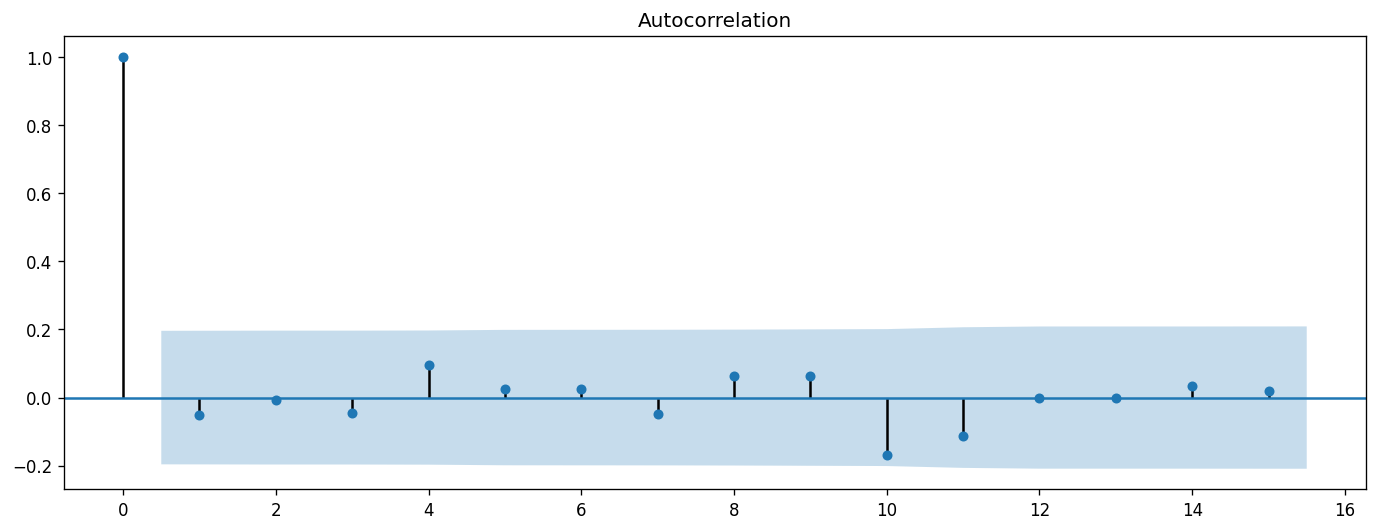

In [ ]:
# LOOKING FOR MA term (q)
plot_acf(
    data1["value"],
    lags = 15
).set_size_inches((14,5));

Tidak terdapat nilai significant lag pada ACF data 1. Sehingga nilai q=0. Berdasarkan grafik diatas, data 1 memiliki nilai p=0, d=0, serta q=0. **Sehingga, data 1 merupakan jenis data White Noise**

##**DATA 2**

In [ ]:
# load dataset 2
data2

,index,value
0,101,2.362450
1,102,3.849367
2,103,2.421574
3,104,5.052382
4,105,4.103413
...,...,...
95,196,-15.973898
96,197,-15.399235
97,198,-14.564530
98,199,-11.981049


In [ ]:
# check data structure
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


- Pada data 2, tidak terdapat nilai null baik pada kolom value maupun index
- Data 2 terdiri dari dari 100 baris serta dua kolom

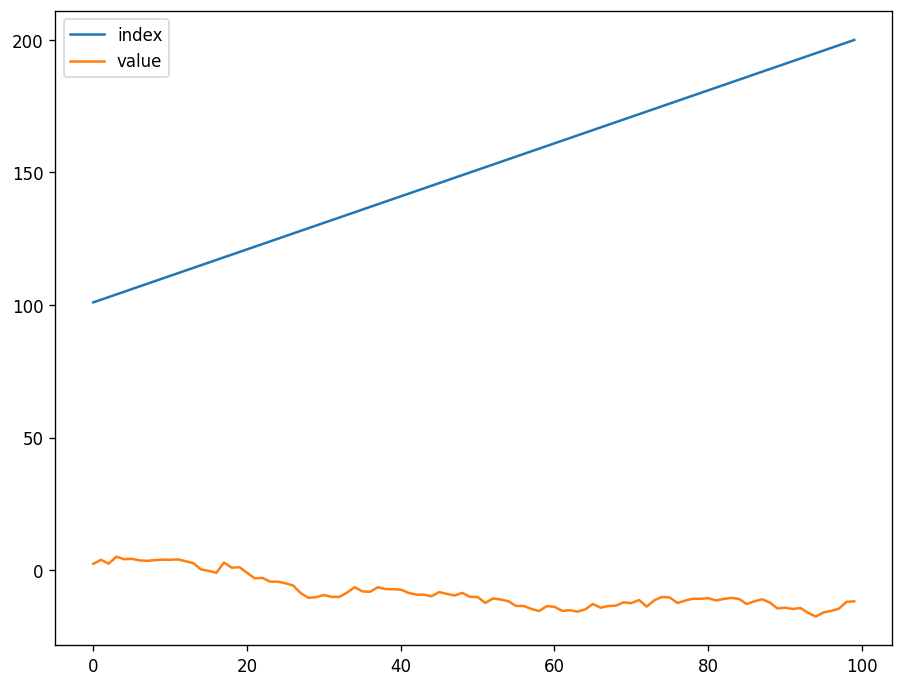

In [ ]:
# plot data 2
data2.plot()

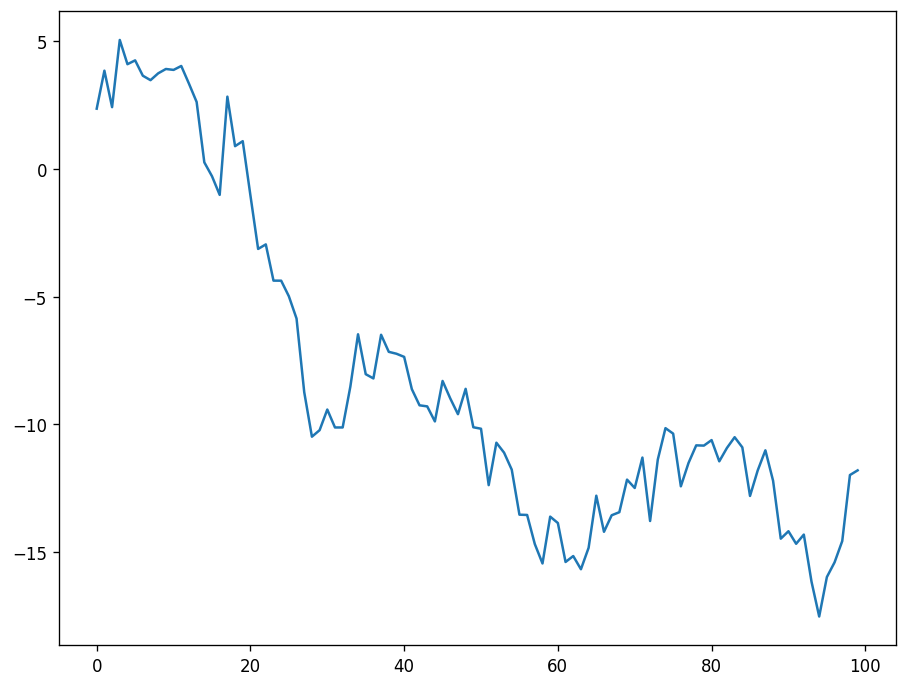

In [ ]:
data2["value"].plot()

Data terlihat memiliki tren, sehingga kita coba cek nilai ADF

In [ ]:
# define adf_test function
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [ ]:
adf_test(data2["value"])

Results of Dickey-Fuller Test:
Test Statistic                 -1.639494
p-value                         0.462525
#Lags Used                      0.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


Nilai p-value pada ADF data 2 adalah 0.46 yaitu melebihi dari 0.05. Sehingga, data tidak stasioner dan perlu dilakukan differencing. Oleh karena itu nilai d=1 pada data 2.

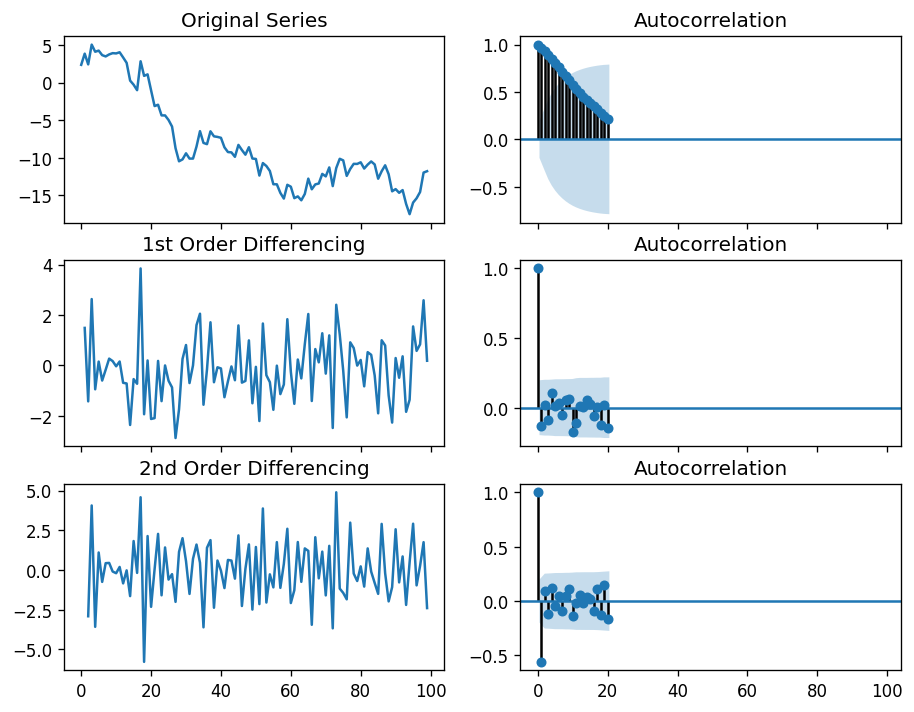

In [ ]:
# LOOKING FOR d

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data2.value); axes[0, 0].set_title('Original Series')
plot_acf(data2.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data2.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data2.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data2.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data2.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Berdasarkan grafik diatas, terlihat bahwa setelah dilakukan differencing dua kali data mengalami over-differencing yang menyebabkan significant lag bernilai sangat negatif. Oleh karena itu, data 2 cukup dilakukan differencing sebanyak satu kali

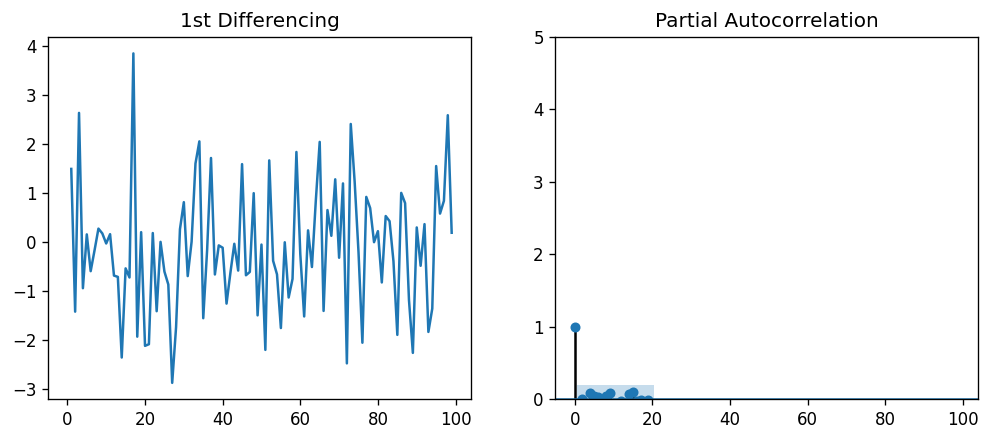

In [ ]:
# LOOKING FOR AR term (p)

plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data2.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data2.value.diff().dropna(), ax=axes[1])

plt.show()

Berdasarkan grafik diatas, terlihat bahwa nilai PACF tidak terdapat significant lag setelah dilakukan differencing 1. Sehingga, nilai p=0

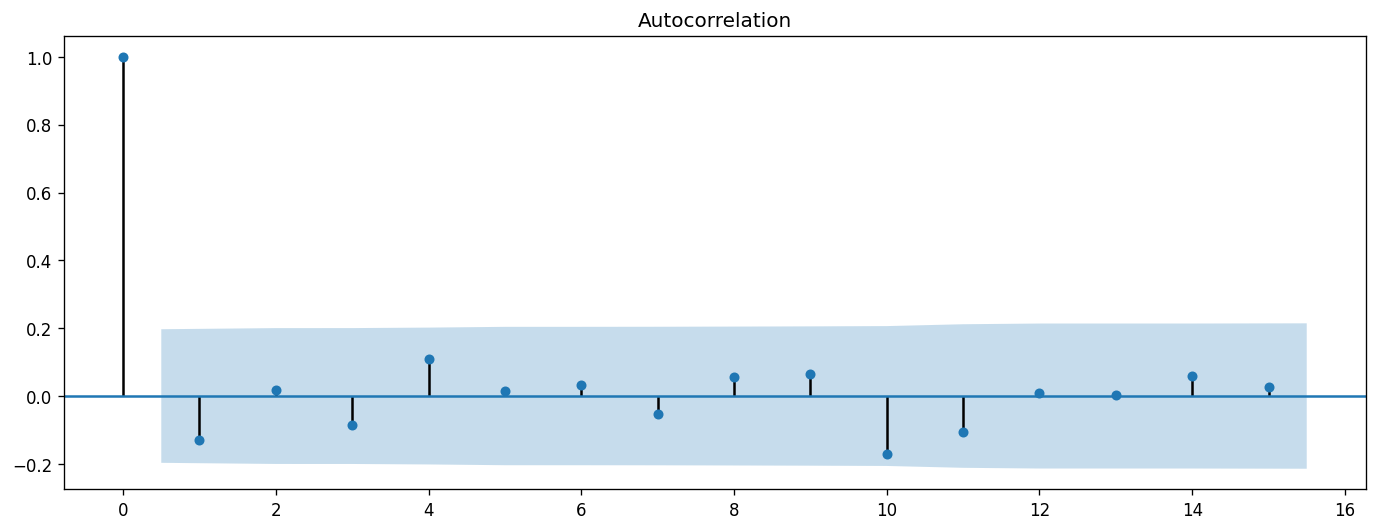

In [ ]:
# LOOKING FOR MA term (q)
plot_acf(
    data2["value"].diff().dropna(),
    lags = 15
).set_size_inches((14,5));

Berdasarkan grafik diatas, terlihat bahwa nilai ACF tidak terdapat significant lag setelah dilakukan differencing 1. Sehingga, nilai q=0. Walaupun pada lag ke-0 signifikan, tetapi nilai tersebut dapat diabaikan. **Pada data 2, terdapat differencing sehingga d=1, p=0, serta q=0. Sehingga, jenis order data tersebut adalah (0,1,0) yaitu jenis data Random Walk**

##**DATA 3**

In [ ]:
# load dataset 3
data3

,index,value
0,101,-1.405059
1,102,0.471055
2,103,-0.006376
3,104,1.030057
4,105,0.207344
...,...,...
95,196,2.114398
96,197,0.942640
97,198,0.645871
98,199,0.886523


In [ ]:
# check data structure
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


- Pada data 3, tidak terdapat nilai null baik pada kolom value maupun index
- Data 3 terdiri dari dari 100 baris serta dua kolom

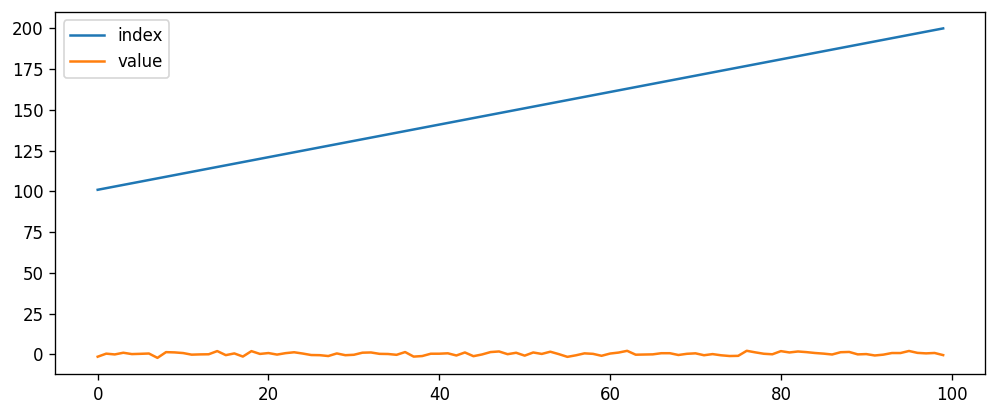

In [ ]:
# plot data 3
data3.plot()

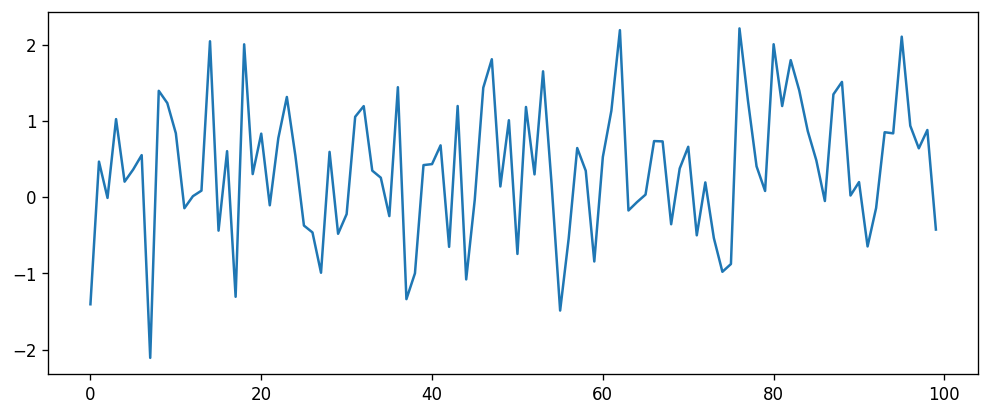

In [ ]:
data3["value"].plot()

Setelah dilakukan plot, terlihat bahwa data 3 cenderung tidak memiliki tren (stasioner). Namun, perlu dicek nilai ADF untuk menentukan secara pasti apakah grafik benar sudah stasioner sehingga tidak perlu dilakukan differencing

In [ ]:
adf_test(data3["value"])

Results of Dickey-Fuller Test:
Test Statistic                 -4.791928
p-value                         0.000056
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


Berdasarkan nilai p-value, data 3 tergolong sudah stasioner karena p-value-0.00005 yang lebih kecil dari 0.05. Sehingga, tidak perlu dilakukan differencing. Oleh karena itu, nilai d=0 pada data 3

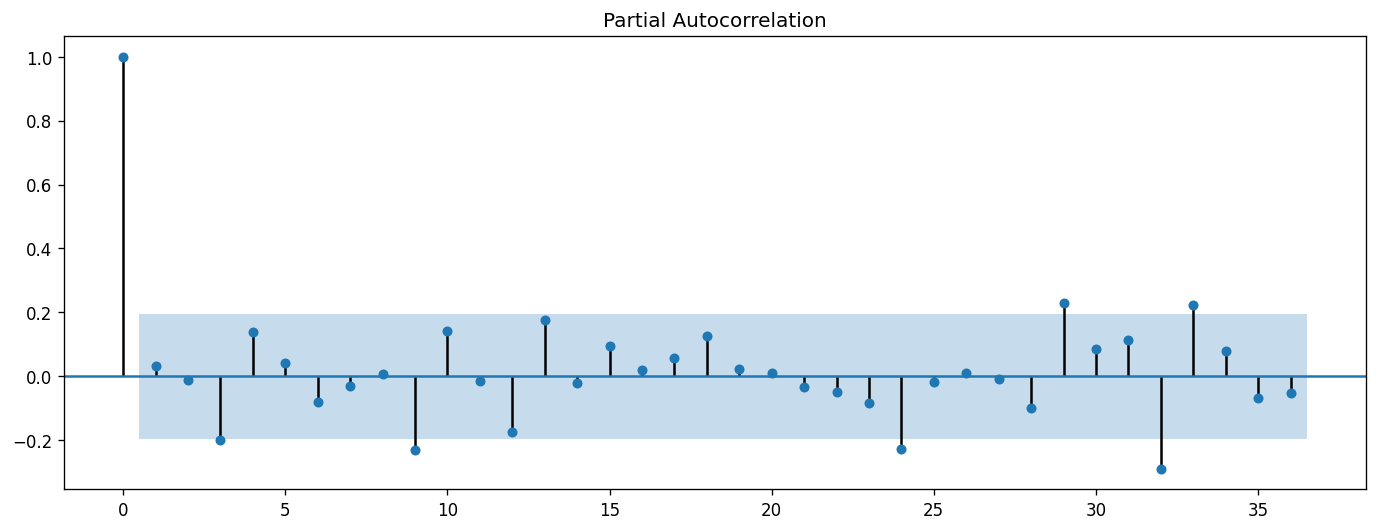

In [ ]:
# LOOKING FOR AR term (p)
plot_pacf(
    data3["value"],
    lags = 36
).set_size_inches((14,5));

Berdasarkan nilai PACF, tidak terdapat nilai significant lag. Sehingga, nilai p=0

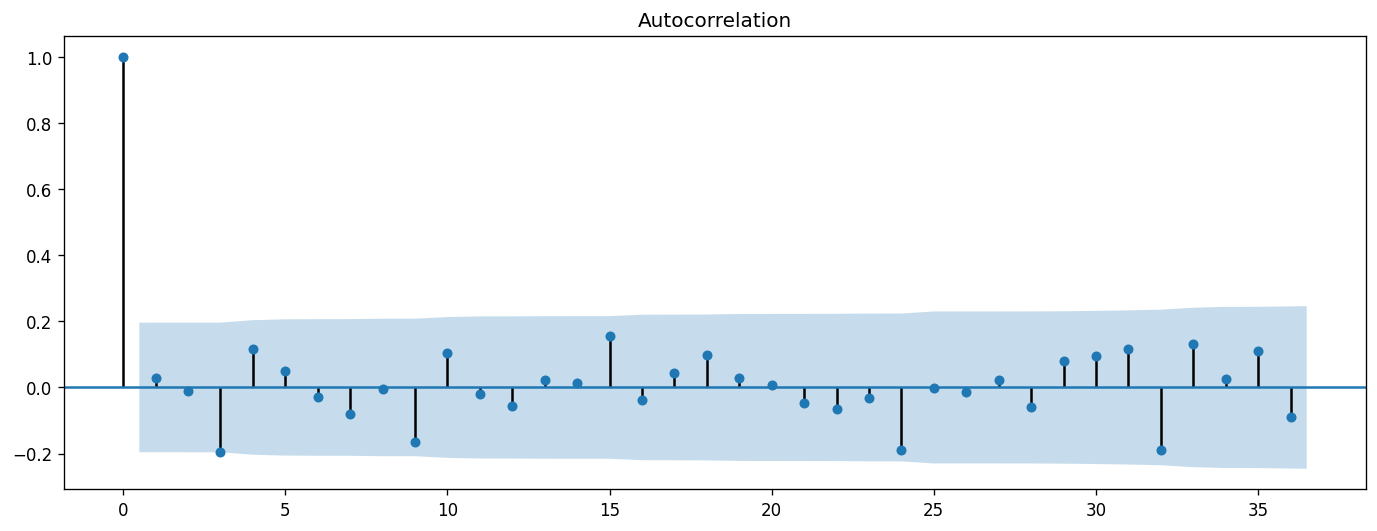

In [ ]:
# LOOKING FOR MA term (q)
plot_acf(
    data3["value"],
    lags = 36
).set_size_inches((14,5));

Berdasarkan nilai ACF, tidak terdapat nilai significant lag. Sehingga nilai q=0. **Pada data 2, terdapat differencing sehingga d=0, p=0, serta q=0. Sehingga, jenis order data tersebut adalah (0,0,0) yaitu jenis data White Noise**

## **DATA 4**

In [ ]:
#load dataset 4
data4

,index,value
0,1 Jan,14.346754
1,1 Feb,14.877385
2,1 Mar,16.630073
3,1 Apr,18.742186
4,1 Mei,17.657716
...,...,...
95,8 Des,-13.082019
96,9 Jan,-6.983444
97,9 Feb,-4.228796
98,9 Mar,-1.374467


In [ ]:
# check data structure
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    object 
 1   value   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


- Pada data 4, tidak terdapat nilai null baik pada kolom value maupun index
- Data 4 terdiri dari dari 100 baris serta dua kolom

In [ ]:
data4

,index,value
0,1 Jan,14.346754
1,1 Feb,14.877385
2,1 Mar,16.630073
3,1 Apr,18.742186
4,1 Mei,17.657716
...,...,...
95,8 Des,-13.082019
96,9 Jan,-6.983444
97,9 Feb,-4.228796
98,9 Mar,-1.374467


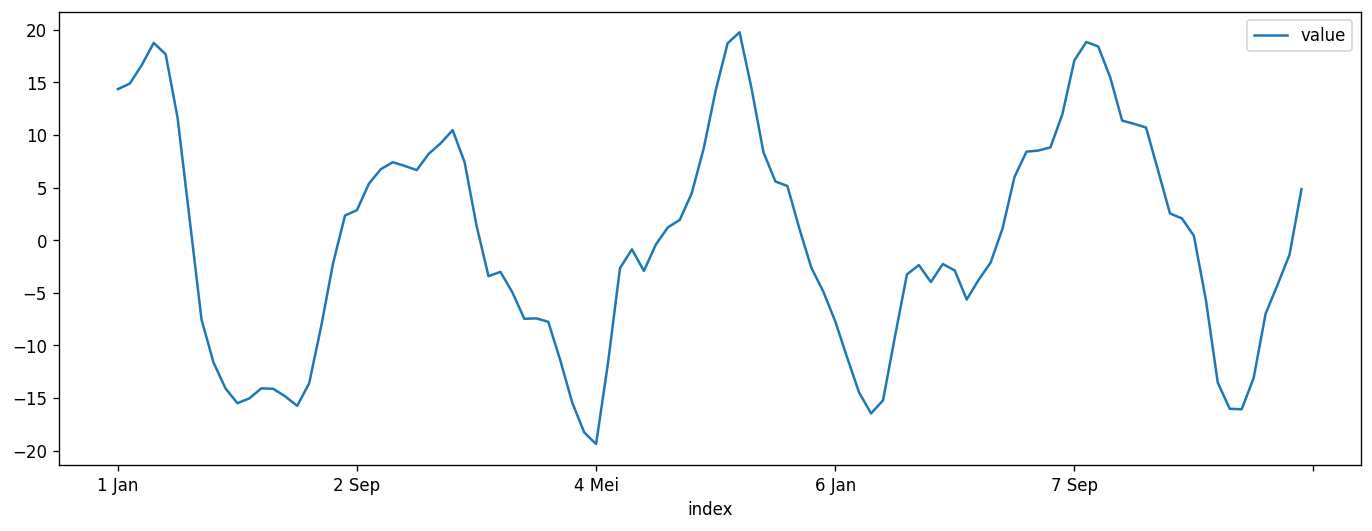

In [ ]:
# plot data 4
data4.plot(
    x = "index",
    y = "value",
    figsize = (14,5)
)

Berdasarkan plot diatas, value pada dataset 4 dapat dipengaruhi oleh index. Sehingga, index dimasukkan dalam plot grafik data 4. Hasil grafik menunjukkan bahwa terdapat siklus pada data tetapi membentuk variasi yang berbeda-beda. Untuk menilai apakah data tersebut stasioner atau tidak, maka perlu dilakukan pengecekan nilai ADF.

In [ ]:
adf_test(data4["value"])

Results of Dickey-Fuller Test:
Test Statistic                 -2.410236
p-value                         0.138868
#Lags Used                     11.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


Nilai p-value pada data 4 mencapai 0.13 yaitu lebih dari 0.05. Sehingga, data dapat disebut tidak stasioner sehingga perlu dilakukan differencing. 



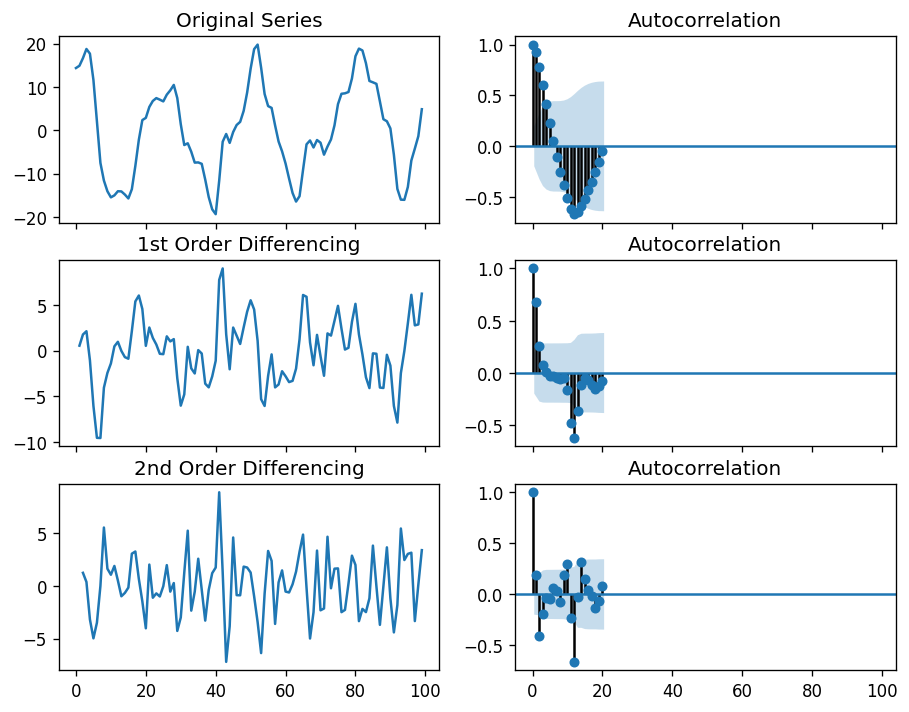

In [ ]:
# LOOKING FOR d

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data4.value); axes[0, 0].set_title('Original Series')
plot_acf(data4.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data4.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data4.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data4.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data4.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Berdasarkan grafik diatas, terlihat bahwa data 4 menjadi lebih stasioner setelah dilakukan differencing sebanyak dua kali. Sehingga, nilai d=2

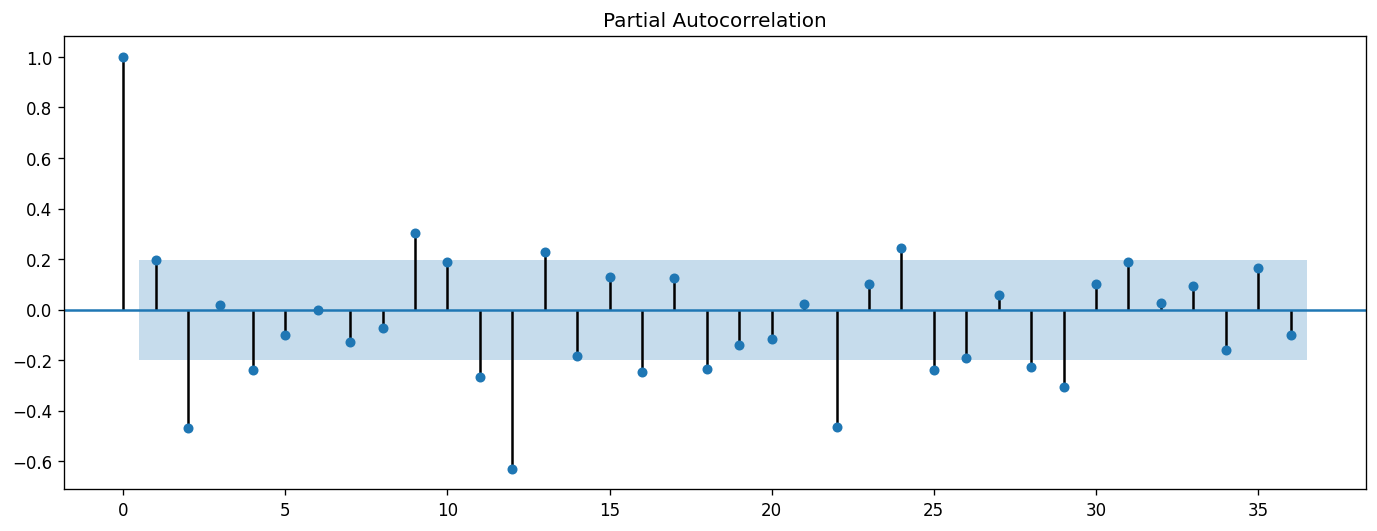

In [ ]:
# LOOKING FOR AR term (p)
plot_pacf(
    data4["value"].diff().diff().dropna(),
    lags = 36
).set_size_inches((14,5));

Berdasarkan grafik diatas, dapat dilihat bahwa data 4 memiliki significant lag PACF pada lag ke-2. Sehingga, nilai p=2

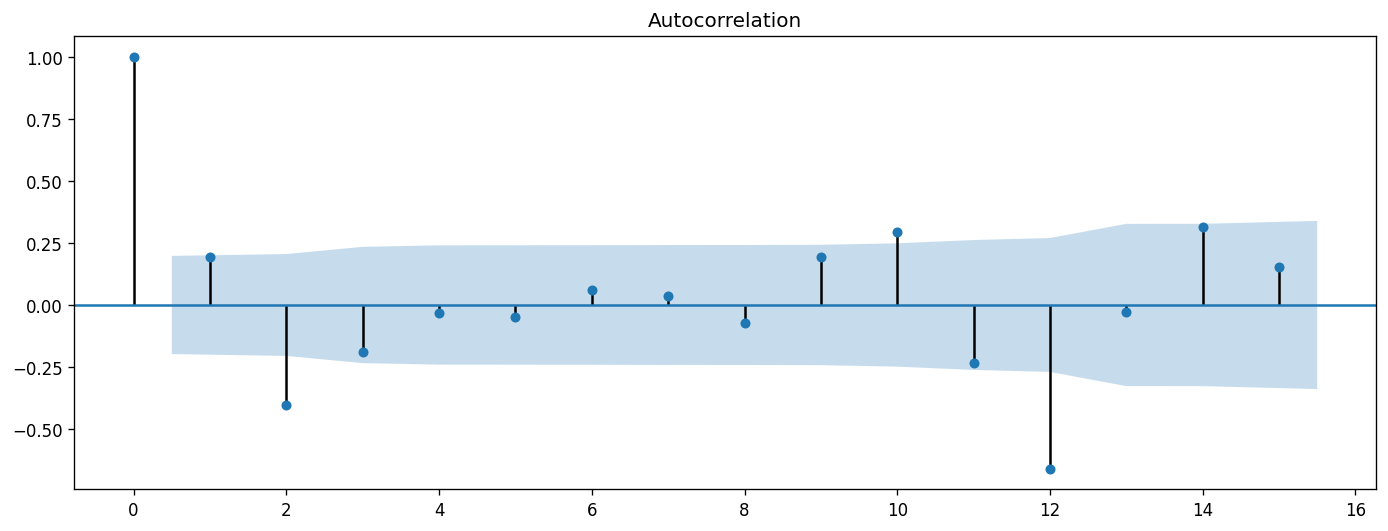

In [ ]:
# LOOKING FOR MA term (q)
plot_acf(
    data4["value"].diff().diff().dropna(),
    lags = 15
).set_size_inches((14,5));

Berdasarkan grafik ACF setelah data 4 dilakukan differencing sebanyak dua kali, terdapat significant lag ke-2. Sehingga, nilai q=2. Oleh karena itu, dapat disimpulkan bahwa pada data 4, d=2, p=2, dan q=2. **Sehingga, data 4 merupakan (2,2,2) atau ARIMA model**

## **DATA 5**

In [ ]:
#load dataset 5
data5

,index,value
0,1 Jan,3.010220
1,1 Feb,0.500811
2,1 Mar,0.430380
3,1 Apr,3.807056
4,1 Mei,1.347951
...,...,...
95,8 Des,16.947572
96,9 Jan,19.623032
97,9 Feb,15.348819
98,9 Mar,19.358615


In [ ]:
# check data structure
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    object 
 1   value   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


- Pada data 5, tidak terdapat nilai null baik pada kolom value maupun index
- Data 5 terdiri dari dari 100 baris serta dua kolom

In [ ]:
data5

,index,value
0,1 Jan,3.010220
1,1 Feb,0.500811
2,1 Mar,0.430380
3,1 Apr,3.807056
4,1 Mei,1.347951
...,...,...
95,8 Des,16.947572
96,9 Jan,19.623032
97,9 Feb,15.348819
98,9 Mar,19.358615


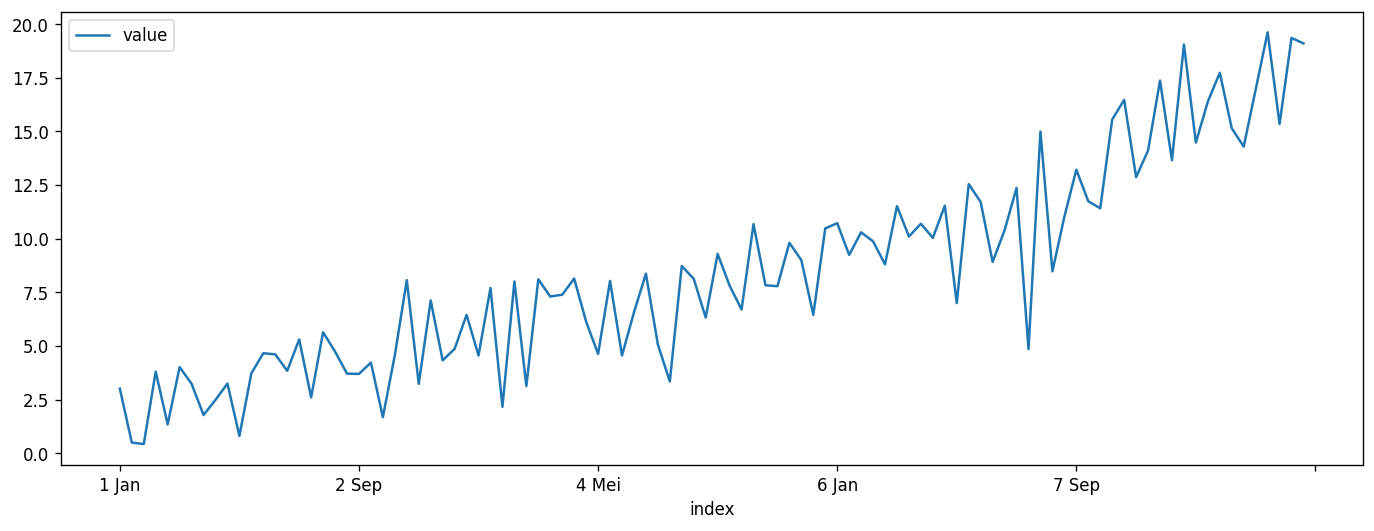

In [ ]:
# plot data 5
data5.plot(
    x = "index",
    y = "value",
    figsize = (14,5)
)

Berdasarkan plot diatas, value pada dataset 5 dapat dipengaruhi oleh index. Sehingga, index dimasukkan dalam plot grafik data 5. Hasil grafik menunjukkan bahwa data terlihat stasioner, tetapi memiliki variansi yang berbeda-beda. Tetapi, untuk memastikannya perlu dilakukan uji ADF

In [ ]:
# ADF testing
adf_test(data5["value"])

Results of Dickey-Fuller Test:
Test Statistic                  1.965343
p-value                         0.998626
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


Nilai p-value yaitu 0.99 yang melebihi dari 5%. Sehingga, dapat disimpulkan bahwa grafik tidak stasioner. Sehingga, perlu dilakukan differencing.

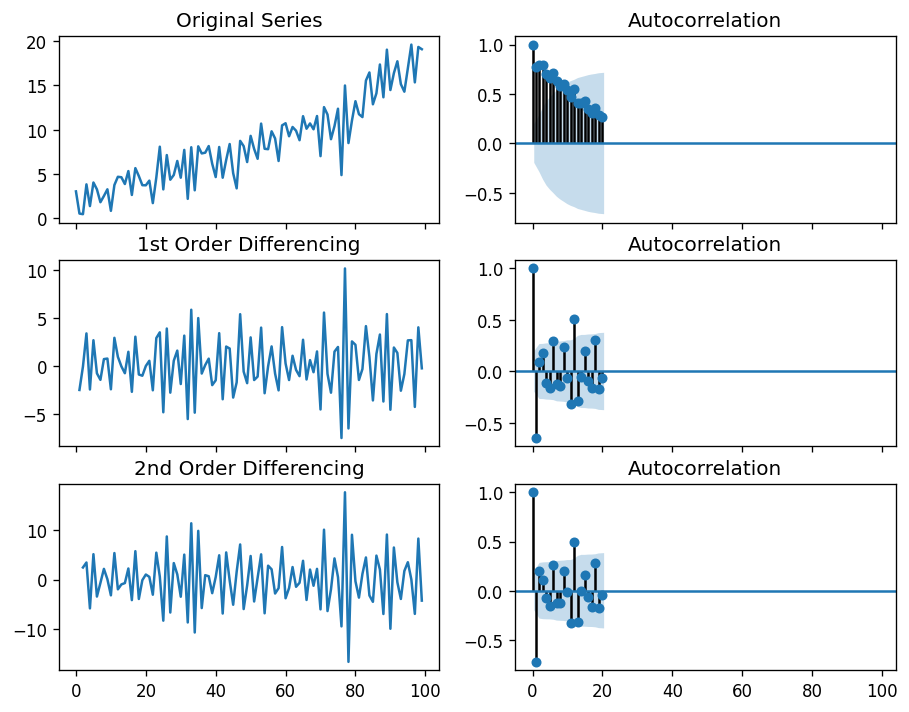

In [ ]:
# LOOKING FOR d

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data5.value); axes[0, 0].set_title('Original Series')
plot_acf(data5.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data5.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data5.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data5.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data5.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Berdasarkan hasil differencing, baik differencing 1x maupun 2x mengalami over-differencing karena nilai significant lag melebihi -0.5. Selain itu nilai d=1 karena perlu dilakukan differencing

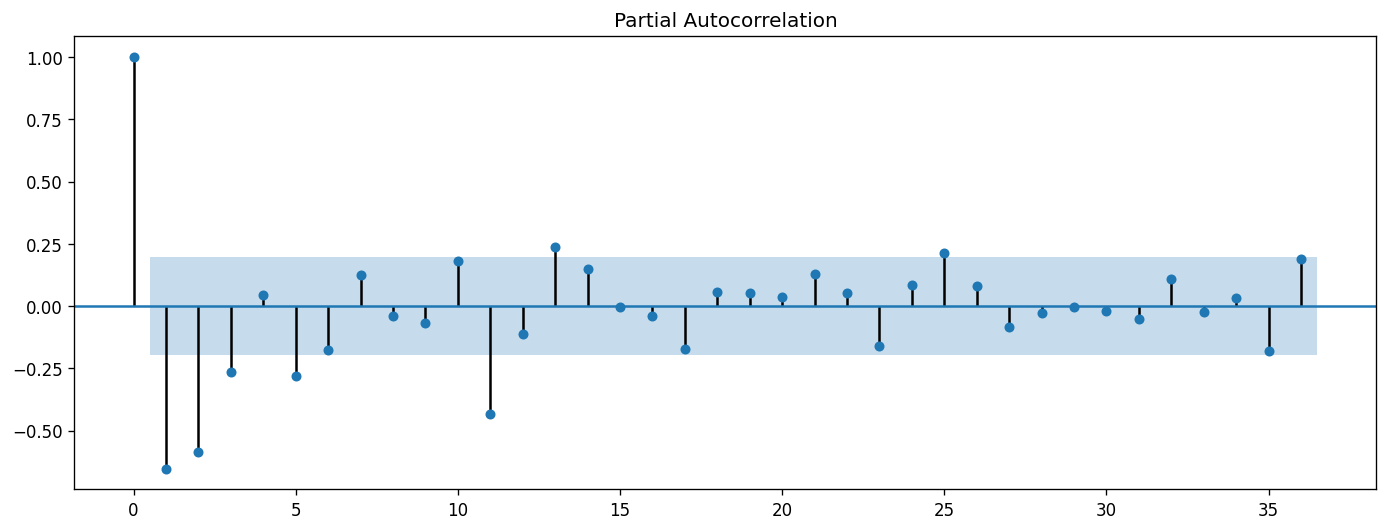

In [ ]:
# LOOKING FOR AR term (p)
plot_pacf(
    data5["value"].diff().dropna(),
    lags = 36
).set_size_inches((14,5));

Nilai PACF pada data 5 memiliki significant lag pada lag ke-3. Sehingga p=3.

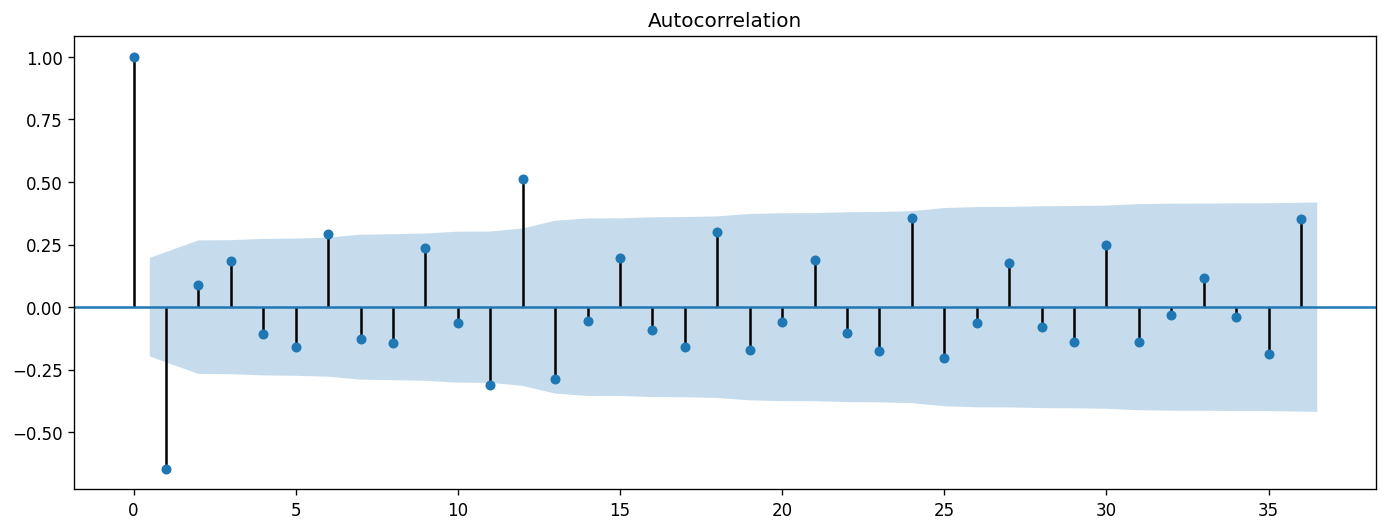

In [ ]:
# LOOKING FOR MA term (q)
plot_acf(
    data5["value"].diff().dropna(),
    lags = 36
).set_size_inches((14,5));

Terdapat significant lag yaitu pada lag ke-1. Sehingga, nilai q=1. Oleh karena itu, **data 5 memiliki nilai (1,1,1) yaitu jenis data ARIMA**

## **DATA 6**

In [ ]:
#load dataset 6
data6

,index,value
0,1 Jan,0.183993
1,1 Feb,1.712356
2,1 Mar,2.761235
3,1 Apr,2.977488
4,1 Mei,1.681076
...,...,...
95,8 Des,47.101730
96,9 Jan,81.688178
97,9 Feb,59.368088
98,9 Mar,46.417090


In [ ]:
# check data structure
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    object 
 1   value   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


- Pada data 6, tidak terdapat nilai null baik pada kolom value maupun index
- Data 6 terdiri dari dari 100 baris serta dua kolom

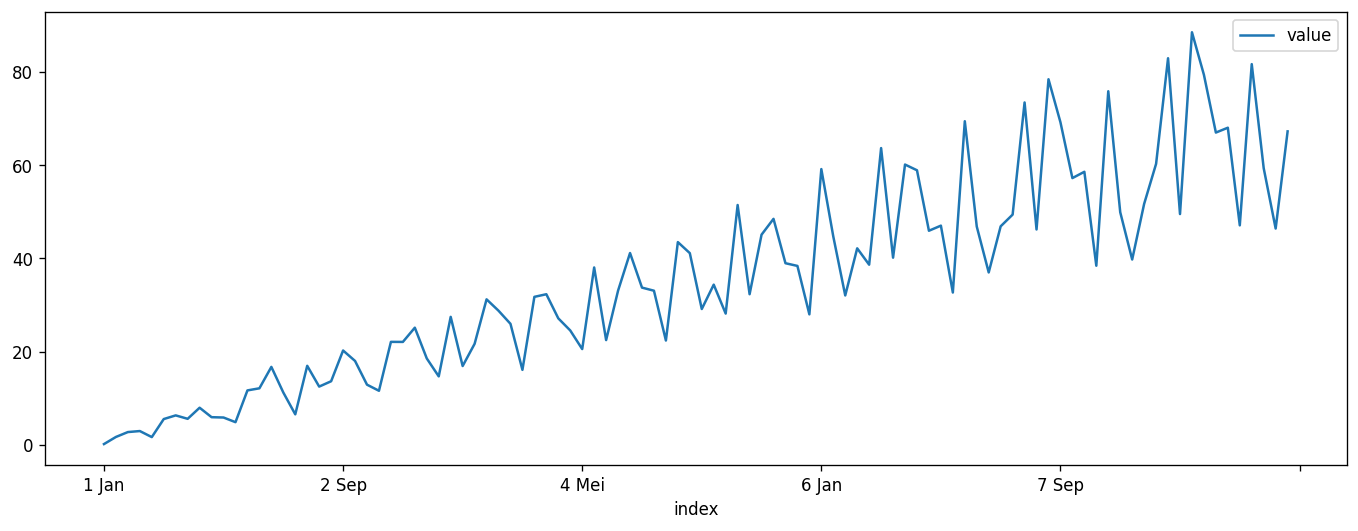

In [ ]:
# plot data 6
data6.plot(
    x = "index",
    y = "value",
    figsize = (14,5)
)

Berdasarkan plot diatas, value pada dataset 6 dapat dipengaruhi oleh index. Sehingga, value dimasukkan dalam plot grafik data 6. Hasil grafik menunjukkan bahwa terdapat trend yang meningkat tetapi memiliki fluktuasi atau variansi yang berbeda-beda

In [ ]:
# ADF test
adf_test(data6["value"])

Results of Dickey-Fuller Test:
Test Statistic                 -0.461408
p-value                         0.899330
#Lags Used                     11.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


Nilai p-value yaitu 0.89 yang melebihi dari 5%. Sehingga, dapat disimpulkan bahwa grafik tidak stasioner. Oleh karena itu, d=1.

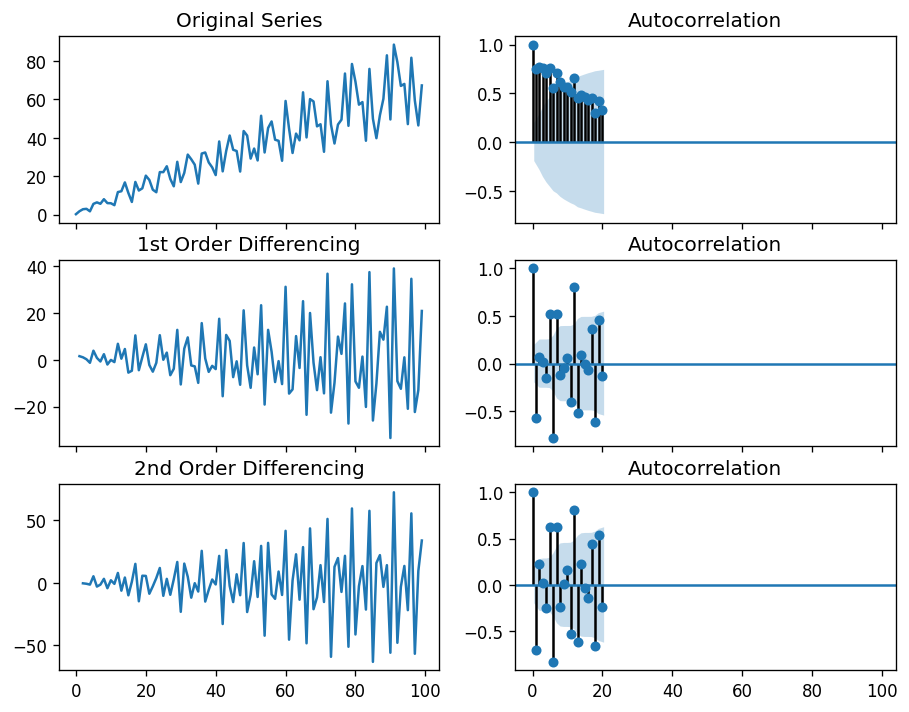

In [ ]:
# LOOKING FOR d

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data6.value); axes[0, 0].set_title('Original Series')
plot_acf(data6.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data6.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data6.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data6.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data6.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Setelah dilakukan differencing, data sudah menjadi stasioner tetapi mengalami peningkatan variasi (multiplicative). Pada grafik diatas, data 6 cukup dilakukan satu kali differencing saja karena untuk differencing kedua, significant lag nya sudah sangat melebihi -0.5

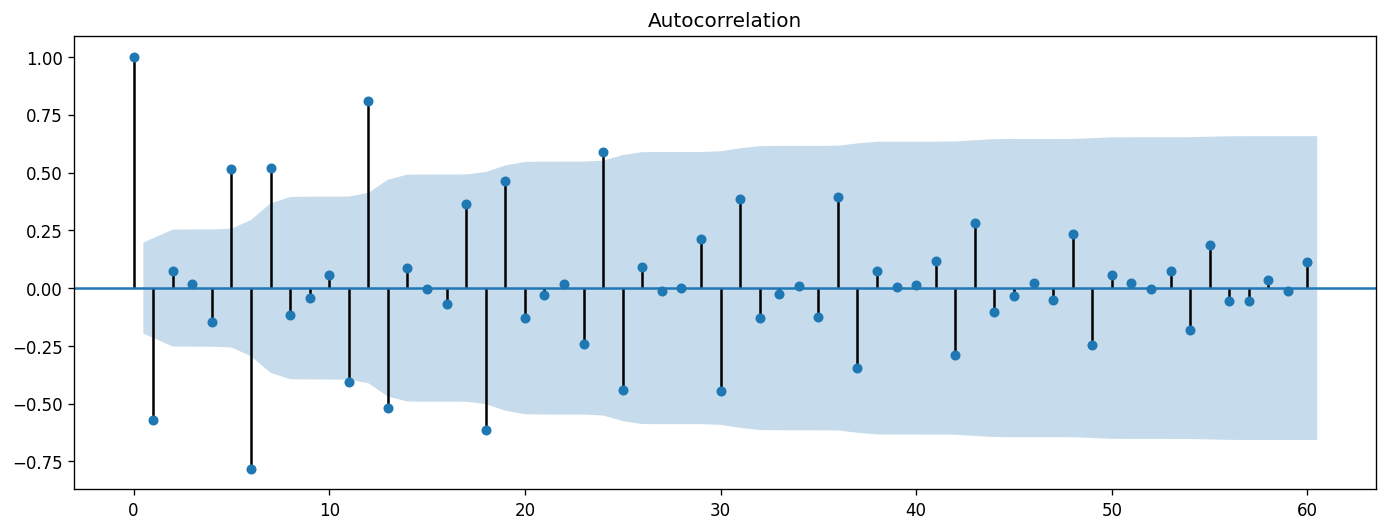

In [ ]:
# LOOKING FOR AR term (p)
plot_acf(
    data6["value"].diff().dropna(),
    lags = 60
).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


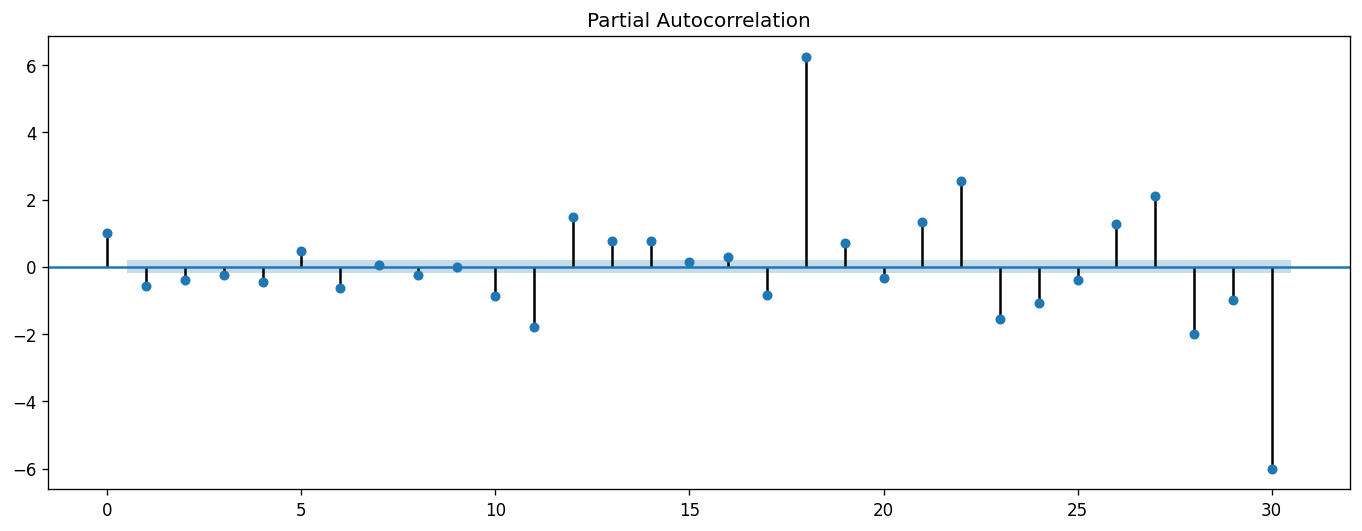

In [ ]:
# LOOKING FOR MA term (q)
plot_pacf(
    data6["value"].diff().dropna(),
    lags = 30
).set_size_inches((14,5));

Berdasarkan grafik diatas, terdapat significant lag baik pada ACF maupun PACF. Pada ACF terdapat significant lag pada lag ke-1. Sedangkan PACF terdapat significant lag pada lag ke-6. Dapat disimpulkan bahwa  **data 6 memiliki nilai (6,1,1) yaitu jenis data ARIMA**

## **DATA 7**

In [ ]:
#load dataset 7
data7

,index,value
0,1 Jan,0.167240
1,1 Feb,4.048346
2,1 Mar,0.898316
3,1 Apr,-5.074511
4,1 Mei,-3.305332
...,...,...
95,8 Des,135.444059
96,9 Jan,156.884276
97,9 Feb,166.921615
98,9 Mar,160.973540


In [ ]:
# check data structure
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    object 
 1   value   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


- Pada data 7, tidak terdapat nilai null baik pada kolom value maupun index
- Data 7 terdiri dari dari 100 baris serta dua kolom

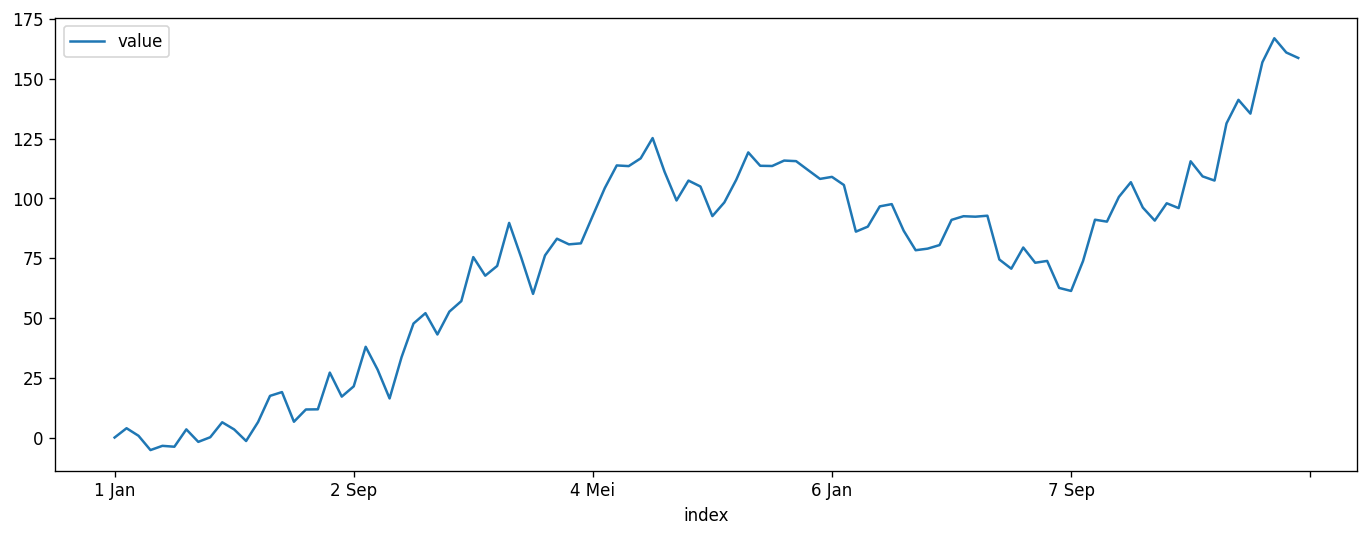

In [ ]:
# plot data 7
data7.plot(
    x = "index",
    y = "value",
    figsize = (14,5)
)

Berdasarkan plot diatas, value pada dataset 7 dapat dipengaruhi oleh index. Sehingga, index dimasukkan dalam plot grafik data 7. Hasil grafik menunjukkan bahwa terdapat trend yang meningkat tetapi kemudian menurun setelah tanggal 4 Mei dan meningkat kembali setelah tanggal 7 September

In [ ]:
# LOOKING FOR differencing (d)

#ADF test
adf_test(data7["value"])

Results of Dickey-Fuller Test:
Test Statistic                 -1.427718
p-value                         0.568918
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


Nilai p-value yaitu 0.56 yang melebihi dari 5%. Sehingga, dapat disimpulkan bahwa grafik tidak stasioner. Oleh karena itu, data perlu di differencing sehingga nilai d=1

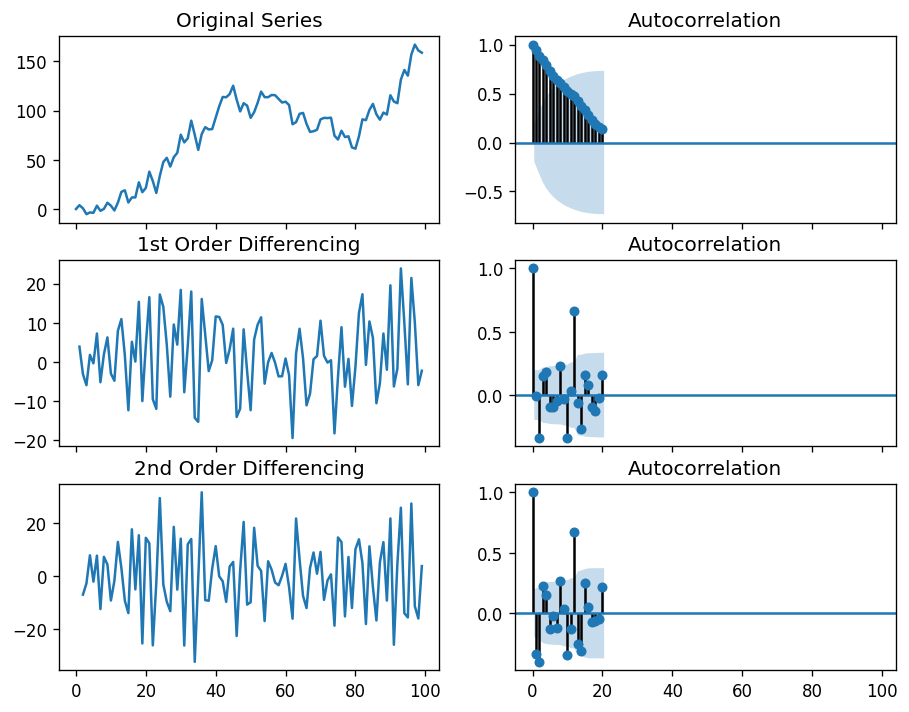

In [ ]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data7.value); axes[0, 0].set_title('Original Series')
plot_acf(data7.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data7.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data7.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data7.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data7.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()


Diagram diatas dapat dilihat bahwa data sudah mulai stasioner setelah melakukan differencing 1 dan differencing 2. Namun, autocorrelation pada differencing 2 terlihat negatif. Hal ini dikarenakan terlalu over-differencing. Oleh karena itu, data cukup di differencing satu kali saja. Hasil ACF differencing 1 menunjukkan bahwa tidak mengalami significant lag. Walaupun pada lag ke-2 mengalami significant, tetapi karena sebelumnya tidak signifikan sehingga stop di lag 1 saja

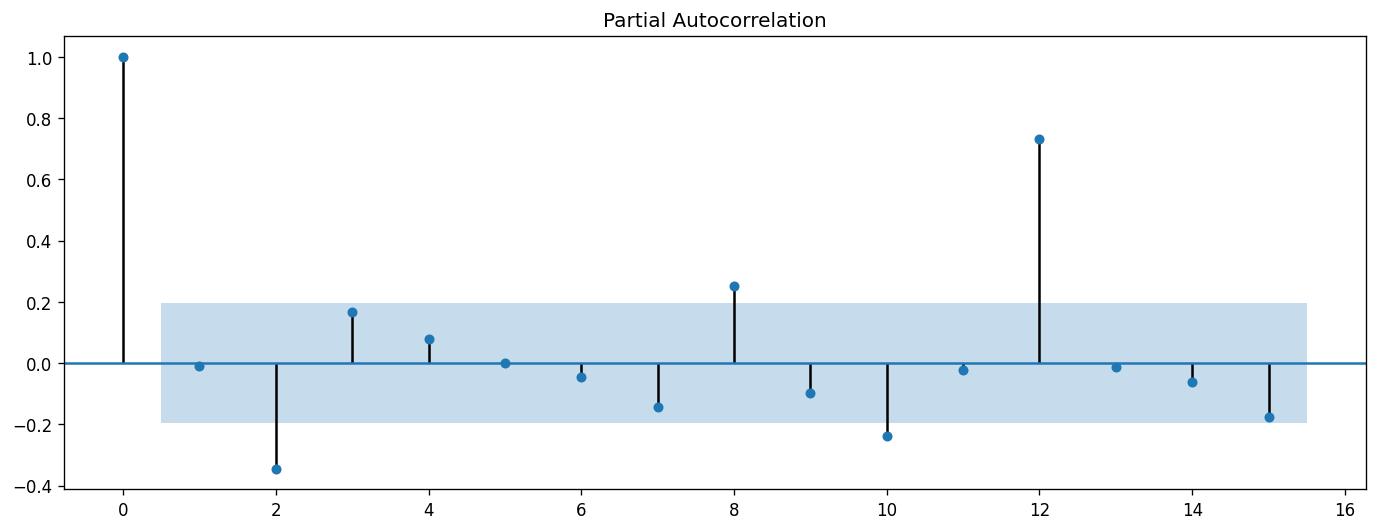

In [ ]:
# LOOKING FOR AR term (p)
plot_pacf(
    data7["value"].diff().dropna(),
    lags = 15
).set_size_inches((14,5));

Berdasarkan grafik diatas, dapat dilihat bahwa nilai PACF nya tidak memiliki nilai significant lag karena setiap nilai berada dalam zona biru. Sehingga nilai p=0

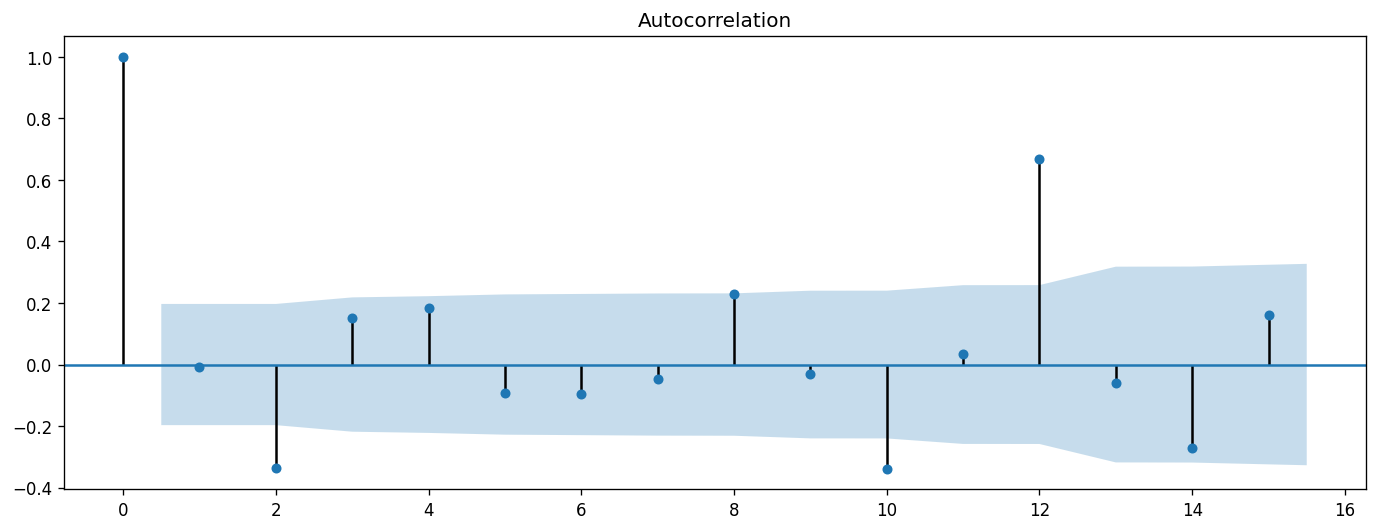

In [ ]:
# LOOKING FOR MA term (q)
plot_acf(
    data7["value"].diff().dropna(),
    lags = 15
).set_size_inches((14,5));

Berdasarkan grafik diatas, dapat dilihat bahwa nilai ACF nya tidak memiliki nilai significant lag karena setiap nilai berada dalam zona biru. Sehingga nilai q=0. Walaupun terdapat significant lag ke-2, tetapi karena lag sebelumnya tidak significant sehingga stop di lag pertama.

**Pada data 7, terdapat differencing sehingga d=1, p=0, serta q=0. Sehingga, jenis order data tersebut adalah (0,1,0) yaitu jenis data Random Walk**

## **DATA 8**

In [ ]:
#load dataset 8
data8

,index,x
0,1,13
1,2,14
2,3,8
3,4,10
4,5,16
...,...,...
94,95,15
95,96,25
96,97,22
97,98,20


In [ ]:
# check data structure
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   99 non-null     int64
 1   x       99 non-null     int64
dtypes: int64(2)
memory usage: 1.7 KB


- Pada data 8, tidak terdapat nilai null baik pada kolom x maupun index
- Data 8 terdiri dari dari 99 baris serta dua kolom

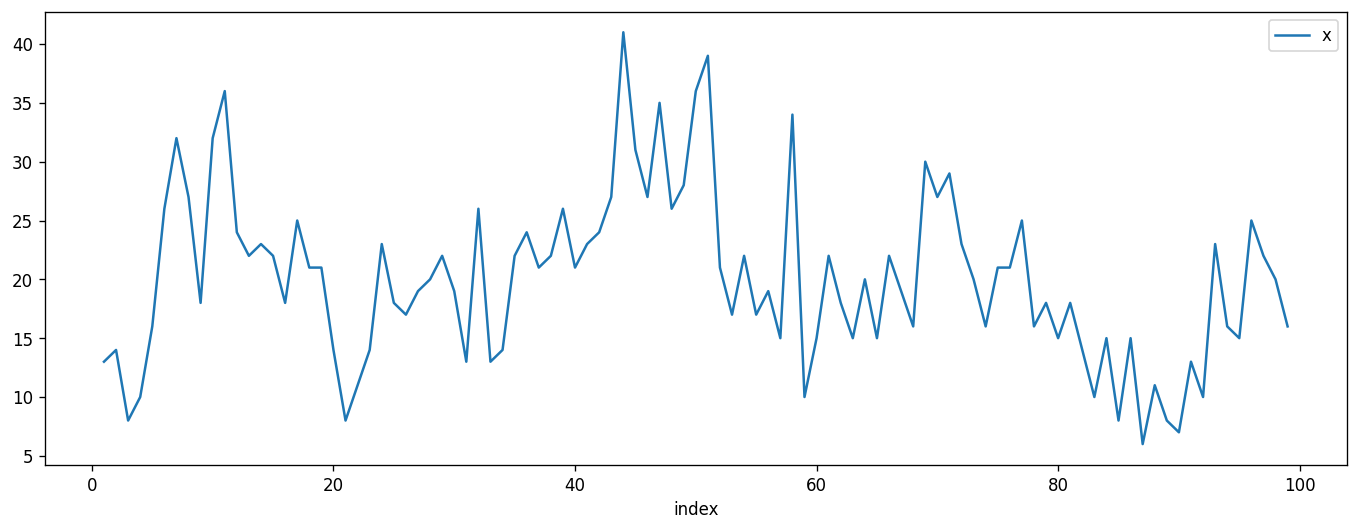

In [ ]:
# plot data 8
data8.plot(
    x = "index",
    y = "x",
    figsize = (14,5)
)

Plot terlihat fluktuatif serta cenderung tidak stasioner. Untuk memastikan plot data 8 stasioner, dilakukan uji ADF

In [ ]:
#ADF test
adf_test(data8["x"])

Results of Dickey-Fuller Test:
Test Statistic                 -3.183192
p-value                         0.020978
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


Nilai p-value pada data 8 adalah 0.02 yaitu lebih kecil dari 0.05. Sehingga, data tersebut stasioner serta tidak perlu dilakukan differencing. Oleh karena itu nilai d=0.

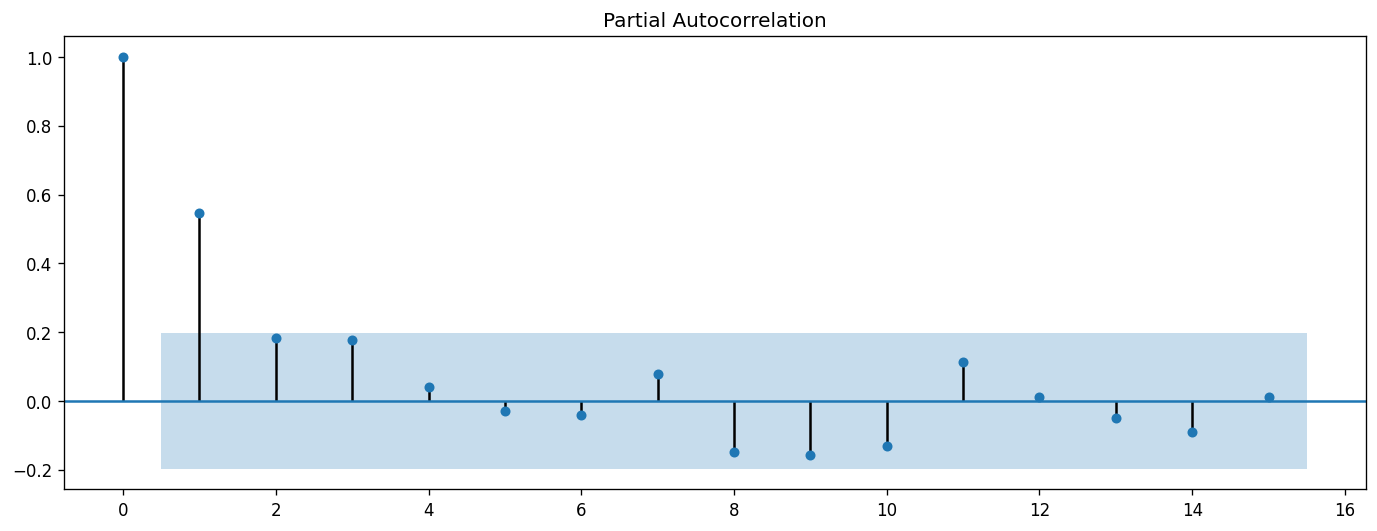

In [ ]:
# LOOKING FOR AR term (p)
plot_pacf(
    data8["x"],
    lags = 15
).set_size_inches((14,5));

Berdasarkan nilai PACF, terdapat significant lag pada lag ke-1. Sehingga nilai p=1

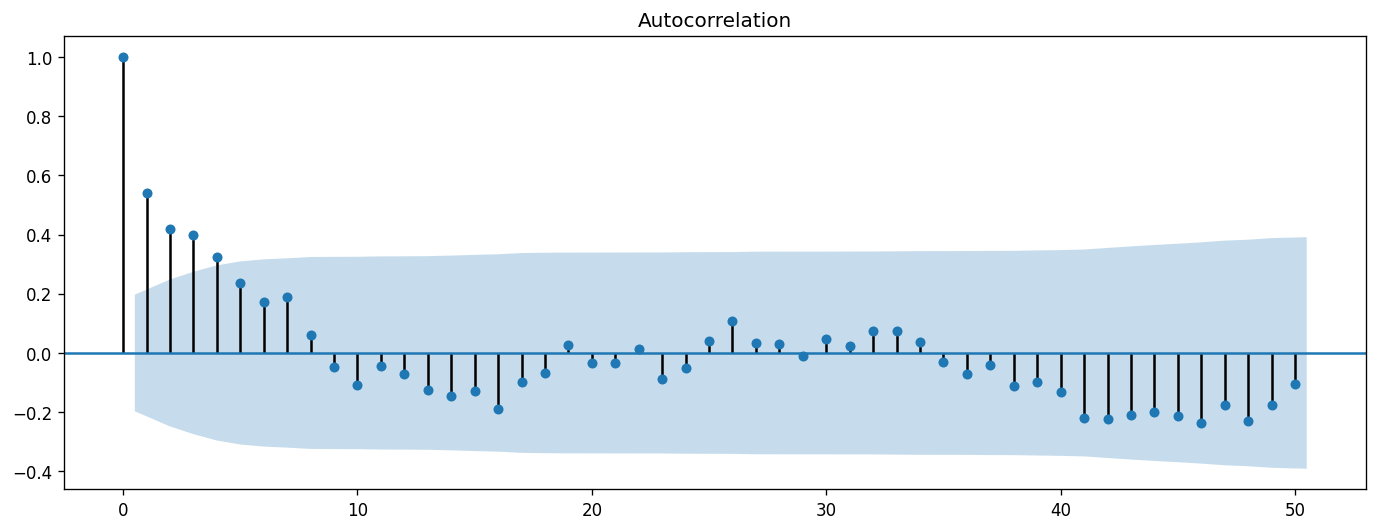

In [ ]:
# LOOKING FOR MA term (q)
plot_acf(
    data8["x"],
    lags = 50
).set_size_inches((14,5));

Berdasarkan nilai ACF, membentuk sebuah pola sehingga dapat diabaikan. Sehingga nilai q=0. Oleh karena itu, dapat disimpulkan bahwa **data 8 memiliki d=0, p=1, serta q=0 yaitu tipe data AR(1)** 

## **DATA 9**

In [ ]:
#load dataset 9
data9

,index,x
0,1,97.85
1,2,104.64
2,3,94.36
3,4,98.05
4,5,95.85
...,...,...
503,504,79.03
504,505,76.56
505,506,78.52
506,507,89.43


In [ ]:
# check data structure
data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   508 non-null    int64  
 1   x       508 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.1 KB


- Pada data 9, tidak terdapat nilai null baik pada kolom x maupun index
- Data 9 terdiri dari dari 508 baris serta dua kolom

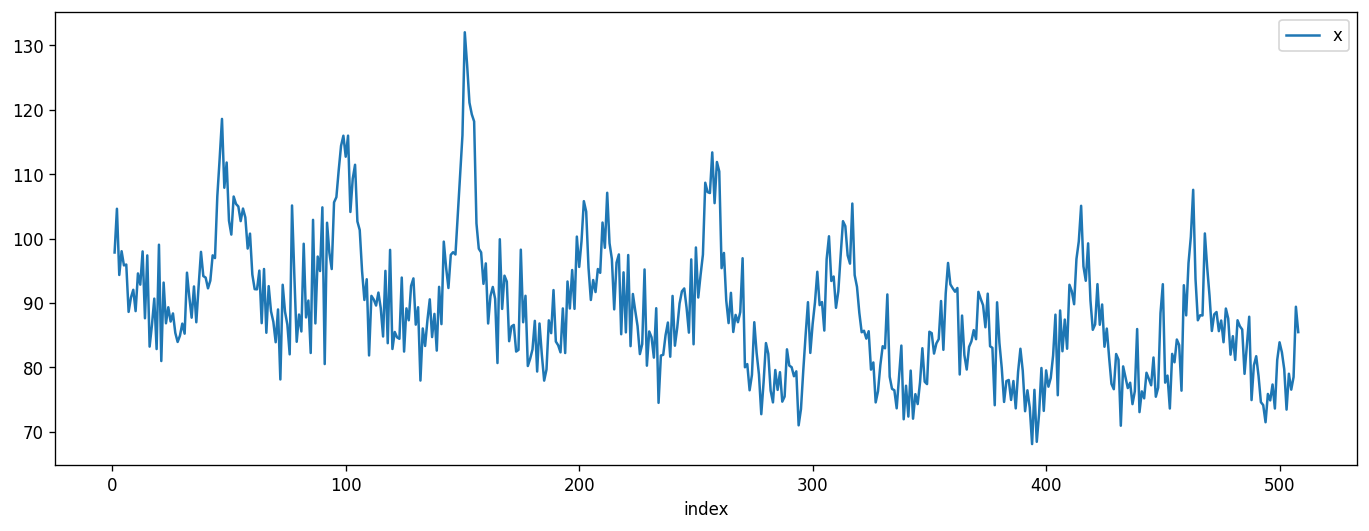

In [ ]:
# plot data 9
data9.plot(
    x = "index",
    y = "x",
    figsize = (14,5)
)

Untuk memastikan apakah data stasioner atau tidak, dapat dilakukan uji ADF dahulu

In [ ]:
#ADF test
adf_test(data9["x"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.815688
p-value                          0.000051
#Lags Used                       1.000000
Number of Observations Used    506.000000
Critical Value (1%)             -3.443340
Critical Value (5%)             -2.867269
Critical Value (10%)            -2.569821
dtype: float64


Berdasarkan hasil ADF, nilai p-value adalah 0.00005 yaitu lebih kecil dari 0.05. Sehingga, plot data 9 sudah stasioner dan tidak perlu dilakukan differencing. Oleh karena itu, nilai d=0

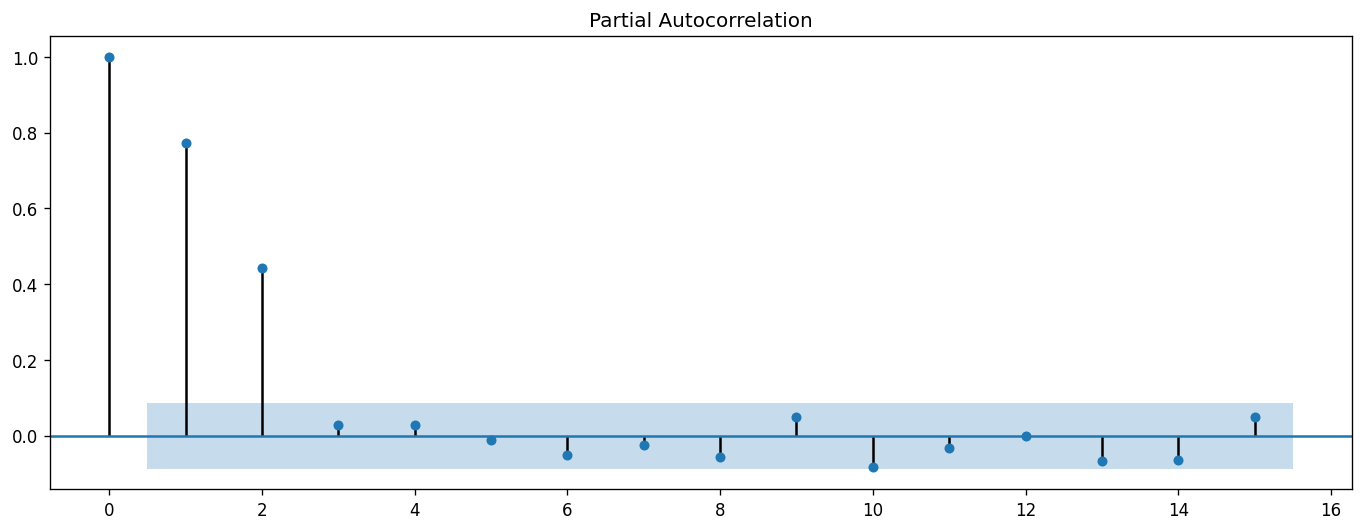

In [ ]:
# LOOKING FOR AR term (p)
plot_pacf(
    data9["x"],
    lags = 15
).set_size_inches((14,5));

Terdapat significant lag ke-2 pada nilai PACF data 9. Sehingga, nilai p=2.

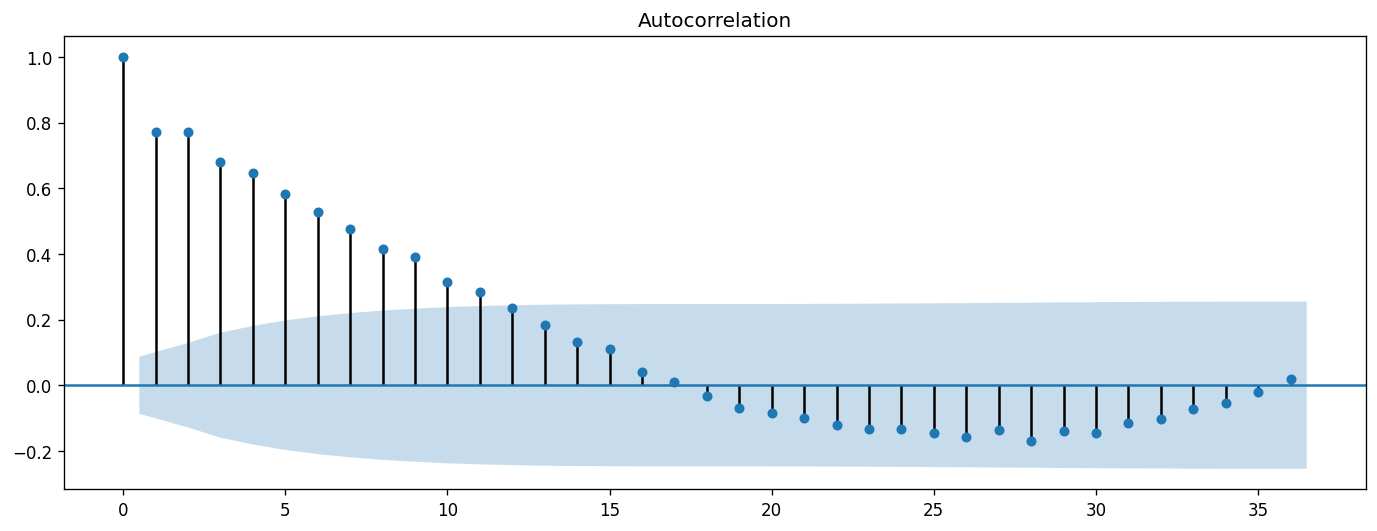

In [ ]:
# LOOKING FOR MA term (q)
plot_acf(
    data9["x"],
    lags = 36
).set_size_inches((14,5));

Nilai ACF tidak terdapat significant lag karena membentuk tren sehingga dapat diabaikan. Sehingga nilai q=0. Oleh karena itu, dapat disimpulkan bahwa **data 9 memiliki nilai d=0, p=2, serta q=0 yaitu AR(2) model**

## **DATA 10**

In [ ]:
#load dataset 10
data10

,index,x
0,1,11.158810
1,2,9.917591
2,3,9.824230
3,4,8.855909
4,5,9.264166
...,...,...
145,146,9.058158
146,147,10.359239
147,148,9.400482
148,149,7.579470


In [ ]:
# check data structure
data10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   150 non-null    int64  
 1   x       150 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


- Pada data 10, tidak terdapat nilai null baik pada kolom x maupun index
- Data 10 terdiri dari dari 150 baris serta dua kolom

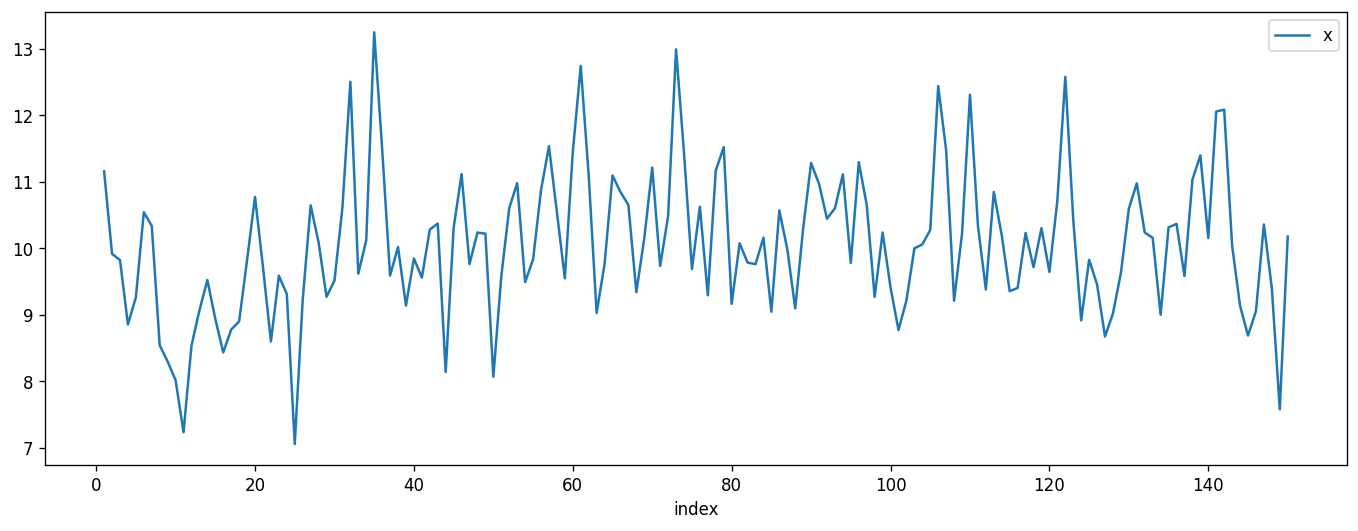

In [ ]:
# plot data 10
data10.plot(
    x = "index",
    y = "x",
    figsize = (14,5)
)

Berdasarkan plot grafik data 10, terlihat bahwa data tersebut stasioner. Tetapi untuk memastikan kembali, dilakukan uji ADF dahulu

In [ ]:
#ADF test
adf_test(data10["x"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.112777
p-value                          0.000922
#Lags Used                       5.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


Berdasarkan hasil ADF, nilai p-value adalah 0.0009 yaitu lebih kecil dari 0.05. Sehingga, plot data 10 sudah stasioner dan tidak perlu dilakukan differencing. Oleh karena itu, nilai d=0

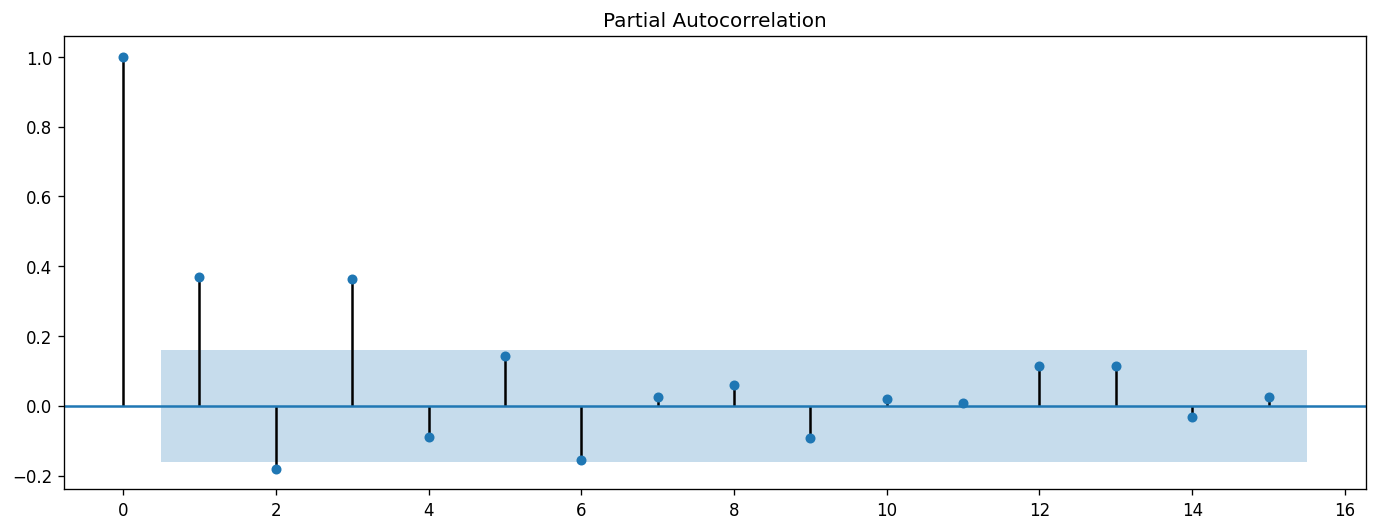

In [ ]:
# LOOKING FOR AR term (p)
plot_pacf(
    data10["x"],
    lags = 15
).set_size_inches((14,5));

Berdasarkan grafik diatas, PACF untuk data 10 dapat diabaikan karena membentuk pola damped sinusoidal. Sehingga, nilai p=0.

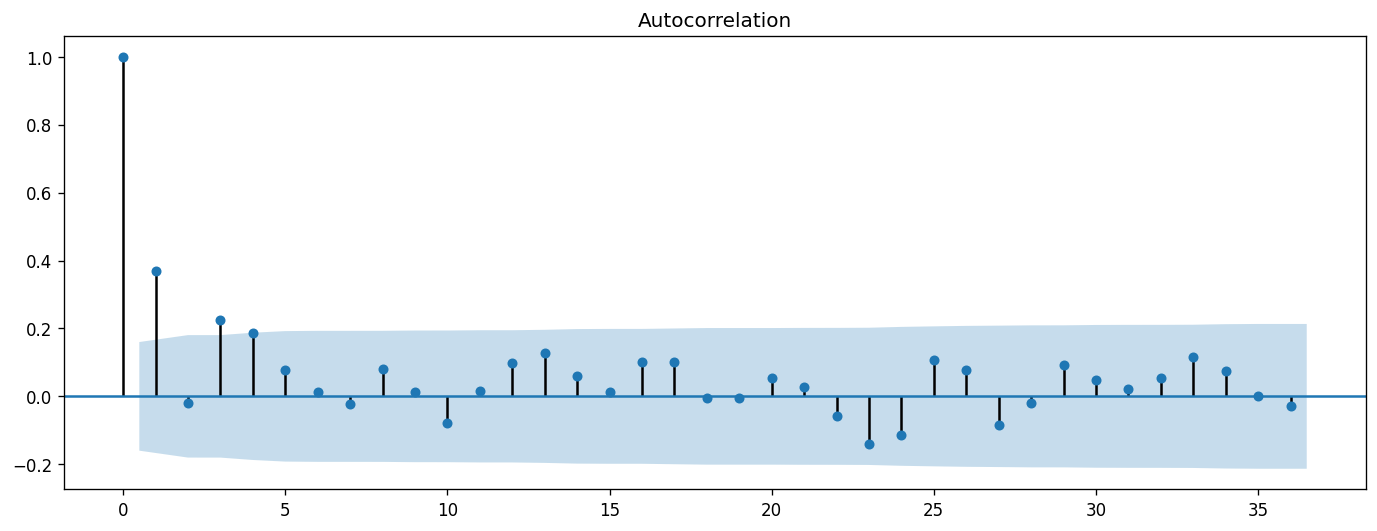

In [ ]:
# LOOKING FOR MA term (q)
plot_acf(
    data10["x"],
    lags = 36
).set_size_inches((14,5));

Nilai ACF pada data 10 memiliki significant lag pada lag ke-1. Sehingga nilai q=1. Oleh karena itu, dapat disimpulkan bahwa **data 10 memiliki nilai d=0, p=0, serta q=1 yaitu MA(1) model**

# Time Serises Analysis - Advance

In [ ]:
# import database
ecommerce_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/superstore_time_series_dataset/superstore_train.csv")

In [ ]:
ecommerce_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,US-2015-165743,2015-11-20,2015-11-23,Second Class,MM-18055,Michelle Moray,Consumer,United States,Aurora,...,80013,West,OFF-BI-10001758,Office Supplies,Binders,Wilson Jones 14 Line Acrylic Coated Pressboard...,9.6120,6,0.70,-7.3692
7996,7997,US-2017-105998,2017-11-03,2017-11-05,First Class,CR-12580,Clay Rozendal,Home Office,United States,San Diego,...,92037,West,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,199.7500,5,0.00,87.8900
7997,7998,US-2017-105998,2017-11-03,2017-11-05,First Class,CR-12580,Clay Rozendal,Home Office,United States,San Diego,...,92037,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,1673.1840,12,0.20,20.9148
7998,7999,US-2014-148194,2014-05-04,2014-05-07,First Class,BS-11365,Bill Shonely,Corporate,United States,Seattle,...,98105,West,FUR-FU-10001852,Furniture,Furnishings,"Eldon Regeneration Recycled Desk Accessories, ...",12.1800,7,0.00,3.8976


In [ ]:
# check data structure
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8000 non-null   int64  
 1   Order ID       8000 non-null   object 
 2   Order Date     8000 non-null   object 
 3   Ship Date      8000 non-null   object 
 4   Ship Mode      8000 non-null   object 
 5   Customer ID    8000 non-null   object 
 6   Customer Name  8000 non-null   object 
 7   Segment        8000 non-null   object 
 8   Country        8000 non-null   object 
 9   City           8000 non-null   object 
 10  State          8000 non-null   object 
 11  Postal Code    8000 non-null   int64  
 12  Region         8000 non-null   object 
 13  Product ID     8000 non-null   object 
 14  Category       8000 non-null   object 
 15  Sub-Category   8000 non-null   object 
 16  Product Name   8000 non-null   object 
 17  Sales          8000 non-null   float64
 18  Quantity

In [ ]:
# change Order Date to date type
ecommerce_data["Order Date"] = pd.to_datetime(ecommerce_data["Order Date"])
ecommerce_data["Ship Date"] = pd.to_datetime(ecommerce_data["Ship Date"])

Tidak terdapat angka null pada setiap kategori variabel

## **1. Menghitung jumlah pembeli, jumlah transaksi, GMV, serta profit**

In [ ]:
df = ecommerce_data

In [ ]:
# Extract for month
df["Month_OrderDate"] = df["Order Date"].dt.month
# Extract for week
df["Week_OrderDate"] = [x.strftime('%A') for x in df["Order Date"]]
# Extract for day
df["Day_OrderDate"] = df["Order Date"].dt.day

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month_OrderDate,Week_OrderDate,Day_OrderDate
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,Tuesday,8
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,Tuesday,8
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,Sunday,12
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,Sunday,11
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,Sunday,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,US-2015-165743,2015-11-20,2015-11-23,Second Class,MM-18055,Michelle Moray,Consumer,United States,Aurora,...,Office Supplies,Binders,Wilson Jones 14 Line Acrylic Coated Pressboard...,9.6120,6,0.70,-7.3692,11,Friday,20
7996,7997,US-2017-105998,2017-11-03,2017-11-05,First Class,CR-12580,Clay Rozendal,Home Office,United States,San Diego,...,Technology,Accessories,Microsoft Sculpt Comfort Mouse,199.7500,5,0.00,87.8900,11,Friday,3
7997,7998,US-2017-105998,2017-11-03,2017-11-05,First Class,CR-12580,Clay Rozendal,Home Office,United States,San Diego,...,Furniture,Tables,Chromcraft Round Conference Tables,1673.1840,12,0.20,20.9148,11,Friday,3
7998,7999,US-2014-148194,2014-05-04,2014-05-07,First Class,BS-11365,Bill Shonely,Corporate,United States,Seattle,...,Furniture,Furnishings,"Eldon Regeneration Recycled Desk Accessories, ...",12.1800,7,0.00,3.8976,5,Sunday,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row ID           8000 non-null   int64         
 1   Order ID         8000 non-null   object        
 2   Order Date       8000 non-null   datetime64[ns]
 3   Ship Date        8000 non-null   datetime64[ns]
 4   Ship Mode        8000 non-null   object        
 5   Customer ID      8000 non-null   object        
 6   Customer Name    8000 non-null   object        
 7   Segment          8000 non-null   object        
 8   Country          8000 non-null   object        
 9   City             8000 non-null   object        
 10  State            8000 non-null   object        
 11  Postal Code      8000 non-null   int64         
 12  Region           8000 non-null   object        
 13  Product ID       8000 non-null   object        
 14  Category         8000 non-null   object 

### **JUMLAH PEMBELI**

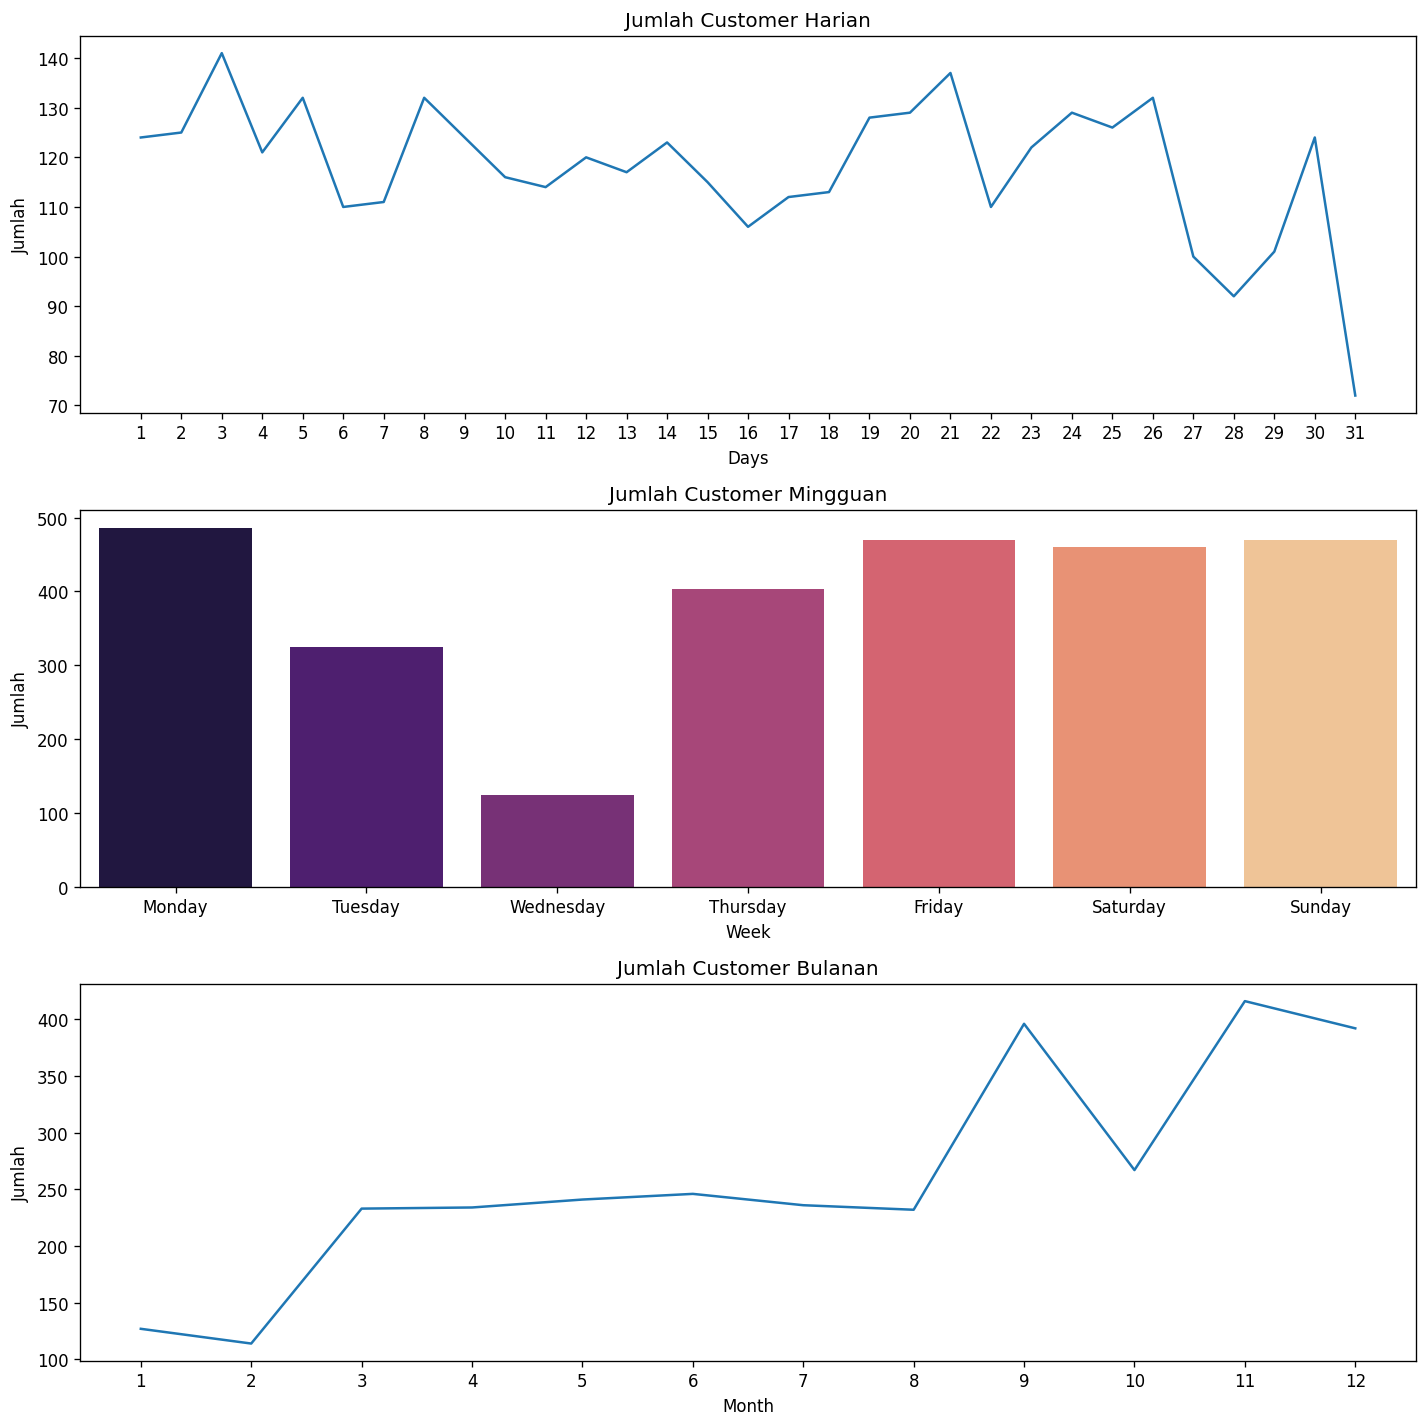

In [ ]:
# daily
Daily_Cust = df.groupby("Day_OrderDate", as_index=False).agg({"Customer ID":lambda x: x.nunique()})

# weekly
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Weekly_Cust = df.groupby("Week_OrderDate", as_index=False).agg({"Customer ID":lambda x: x.nunique()})

# monthly
Monthly_Cust = df.groupby("Month_OrderDate", as_index=False).agg({"Customer ID":lambda x: x.nunique()})

plt.figure(figsize = (12,12))
plt.subplot (3,1,1)
sns.lineplot(data=Daily_Cust, x="Day_OrderDate",y="Customer ID").set_title("Jumlah Customer Harian")
plt.xticks([i for i in np.arange(1,32)])
plt.xlabel("Days")
plt.ylabel("Jumlah")

plt.subplot (3,1,2)
sns.barplot(data=Weekly_Cust, x="Week_OrderDate",y="Customer ID", palette="magma",order=order).set_title("Jumlah Customer Mingguan")
plt.xlabel("Week")
plt.ylabel("Jumlah")

plt.subplot (3,1,3)
sns.lineplot(data=Monthly_Cust, x="Month_OrderDate",y="Customer ID").set_title("Jumlah Customer Bulanan")
plt.xticks([i for i in np.arange(1,13)])
plt.xlabel("Month")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa:
- Jumlah pembeli harian, mengalami peningkatan pada tanggal 1-3, kemudian mengalami penurunan. Setelah itu, data cenderung konstan dengan beberapa fluktuasi. Kemudian, jumlah pelanggan menurun secara drastis pada akhir bulan yaitu pada tanggal 30 dan 31. Hal ini bisa jadi disebabkan karena pada akhir bulan, gaji pembeli sudah berkurang sehingga mengalami penurunan jumlah pembeli. Tapi, pada awal bulan karena baru gajian sehingga jumlah pembeli cenderung meningkat. 
- Jumlah pembeli mingguan, mengalami penurunan jumlah pembeli pada hari Selasa serta Rabu. Selain itu, mengalami peningkatan kembali pada hari Jumat, Sabtu, serta Minggu. Hal ini dikarenakan pada hari Selasa dan Rabu merupakan hari kerja, sehingga bisa jadi para pembeli tidak sempat melakukan transaksi. Sedangkan hari Kamis dan Jumat merupakan hari menuju weekend sehingga mengalami peningkatan jumlah pembeli.
- Jumlah pembeli bulanan, mengalami peningkatan seiring berjalannya bulan. Pada akhir tahun, terjadi peningkatan jumlah pembeli secara besar-besaran. Hal ini dikarenakan pada akhir tahun biasanya terdapat cuci gudang sehingga banyak barang diskon. Selain itu, pada akhir tahun terdapat beberapa event seperti Halloween serta Natal

### **JUMLAH TRANSAKSI**

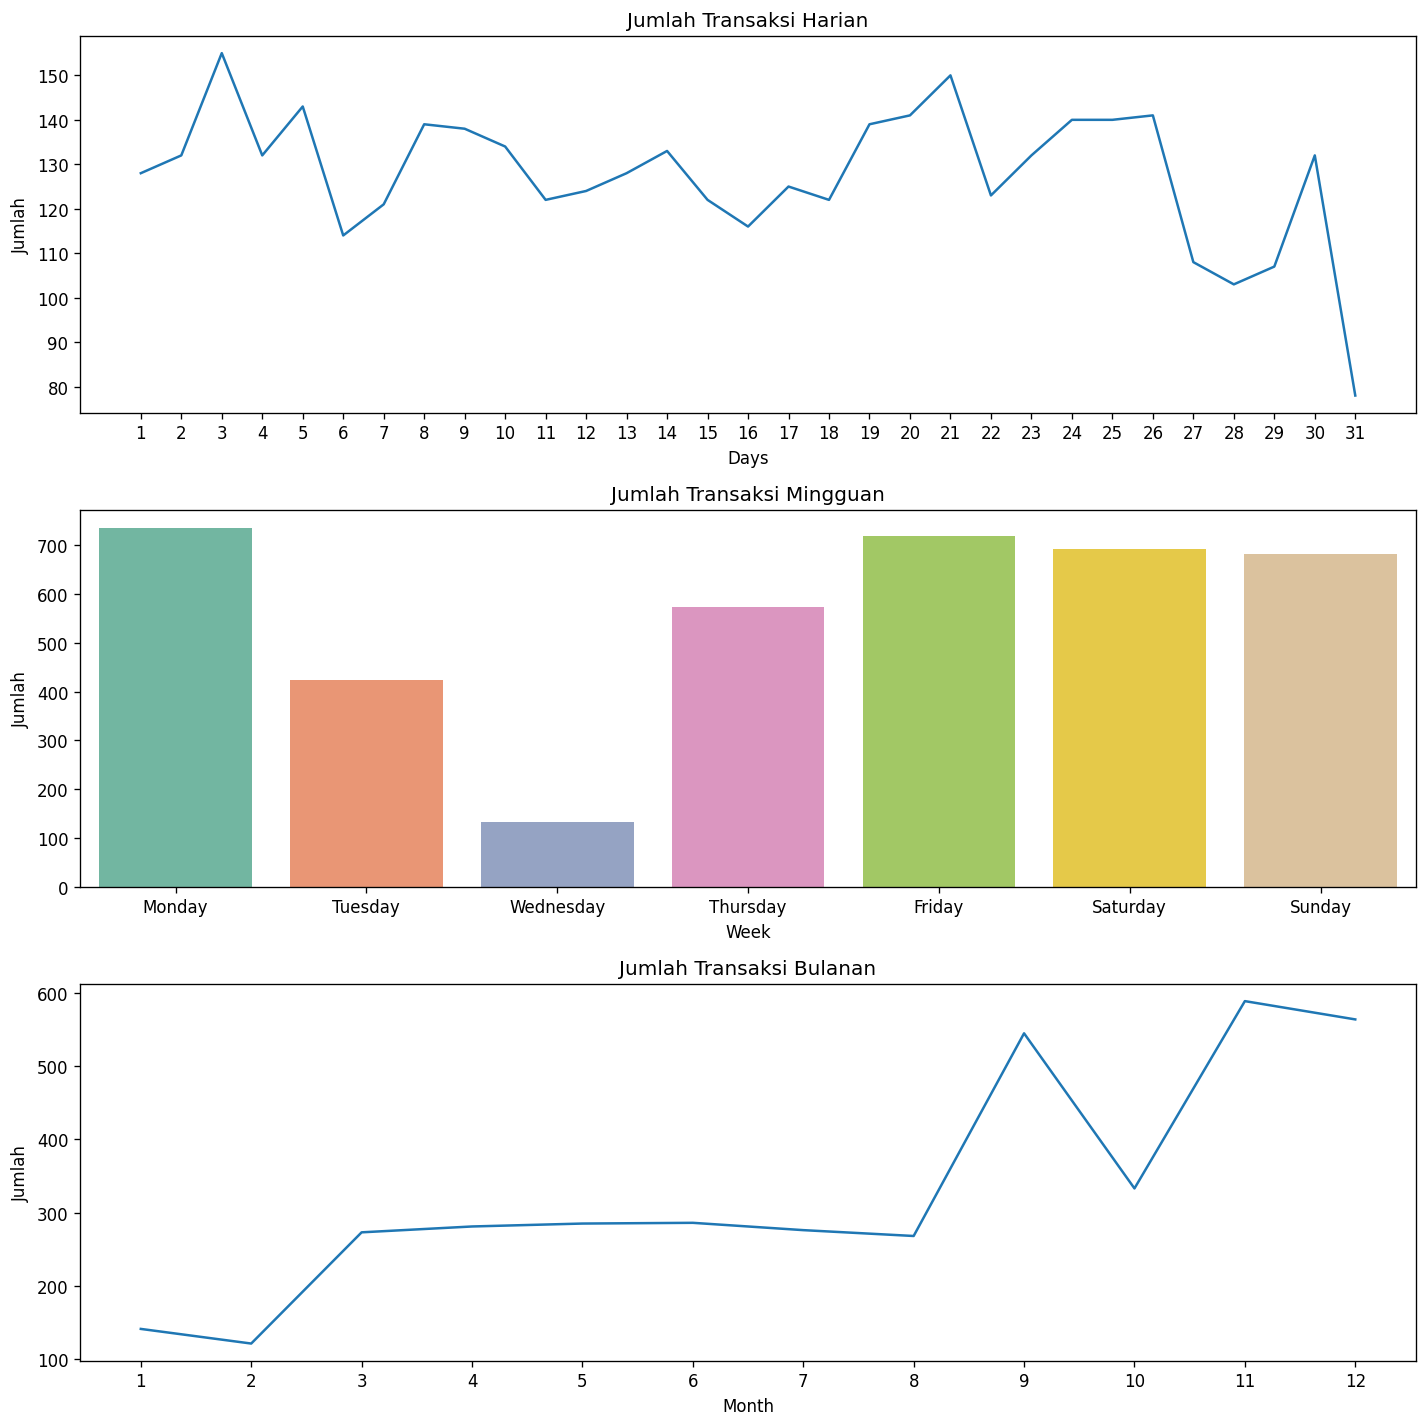

In [ ]:
# daily
Daily_Trx = df.groupby("Day_OrderDate", as_index=False).agg({"Order ID":lambda x: x.nunique()})

# weekly
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Weekly_Trx = df.groupby("Week_OrderDate", as_index=False).agg({"Order ID":lambda x: x.nunique()})

# monthly
Monthly_Trx = df.groupby("Month_OrderDate", as_index=False).agg({"Order ID":lambda x: x.nunique()})

plt.figure(figsize = (12,12))
plt.subplot (3,1,1)
sns.lineplot(data=Daily_Trx, x="Day_OrderDate",y="Order ID").set_title("Jumlah Transaksi Harian")
plt.xticks([i for i in np.arange(1,32)])
plt.xlabel("Days")
plt.ylabel("Jumlah")

plt.subplot (3,1,2)
sns.barplot(data=Weekly_Trx, x="Week_OrderDate",y="Order ID", palette="Set2",order=order).set_title("Jumlah Transaksi Mingguan")
plt.xlabel("Week")
plt.ylabel("Jumlah")

plt.subplot (3,1,3)
sns.lineplot(data=Monthly_Trx, x="Month_OrderDate",y="Order ID").set_title("Jumlah Transaksi Bulanan")
plt.xticks([i for i in np.arange(1,13)])
plt.xlabel("Month")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()

Dalam menghitung jumlah transaksi, menggunakan Order ID. Hal ini dikarenakan jika menggunakan Customer ID, bisa jadi tidak terhitung semua transaksinya. Contohnya apabila satu customer membeli 4 barang, maka customer ID hanya satu. Sehingga, pada perhitungan transaksi menggunakan Order ID. Berdasarkan grafik diatas, dapat dilihat bahwa:
- Jumlah transaksi harian, mengalami peningkatan pada tanggal 1-3, kemudian mengalami penurunan. Setelah itu, data cenderung konstan dengan beberapa fluktuasi. Kemudian, jumlah transaksi menurun secara drastis pada akhir bulan yaitu pada tanggal 30 dan 31. Hal ini bisa jadi disebabkan karena pada akhir bulan, gaji pembeli sudah berkurang sehingga mengalami penurunan jumlah transaksi. Tapi, pada awal bulan karena baru gajian sehingga jumlah transaksi cenderung meningkat.
- Jumlah transaksi mingguan, mengalami penurunan jumlah transaksi pada hari Selasa serta Rabu. Selain itu, mengalami peningkatan kembali pada hari Jumat, Sabtu, serta Minggu. Hal ini dikarenakan pada hari Selasa dan Rabu merupakan hari kerja, sehingga bisa jadi para pembeli tidak sempat melakukan transaksi. Sedangkan hari Kamis dan Jumat merupakan hari menuju weekend sehingga mengalami peningkatan jumlah transaksi.
- Jumlah transaksi bulanan, mengalami peningkatan seiring berjalannya bulan. Pada akhir tahun, terjadi peningkatan jumlah transaksi secara besar-besaran. Hal ini dikarenakan pada akhir tahun biasanya terdapat cuci gudang sehingga banyak barang diskon. Selain itu, pada akhir tahun terdapat beberapa event seperti Halloween serta Natal

Secara umum, hasil grafik pada jumlah transaksi mirip dengan grafik jumlah pembeli. Sehingga, dapat disimpulkan bahwa jumlah pembeli berhubungan dengan jumlah transaksi

### **GMV**


In [ ]:
# define GMV
df["GMV"] = df["Quantity"]*(df["Sales"] - df["Discount"]*df["Sales"])

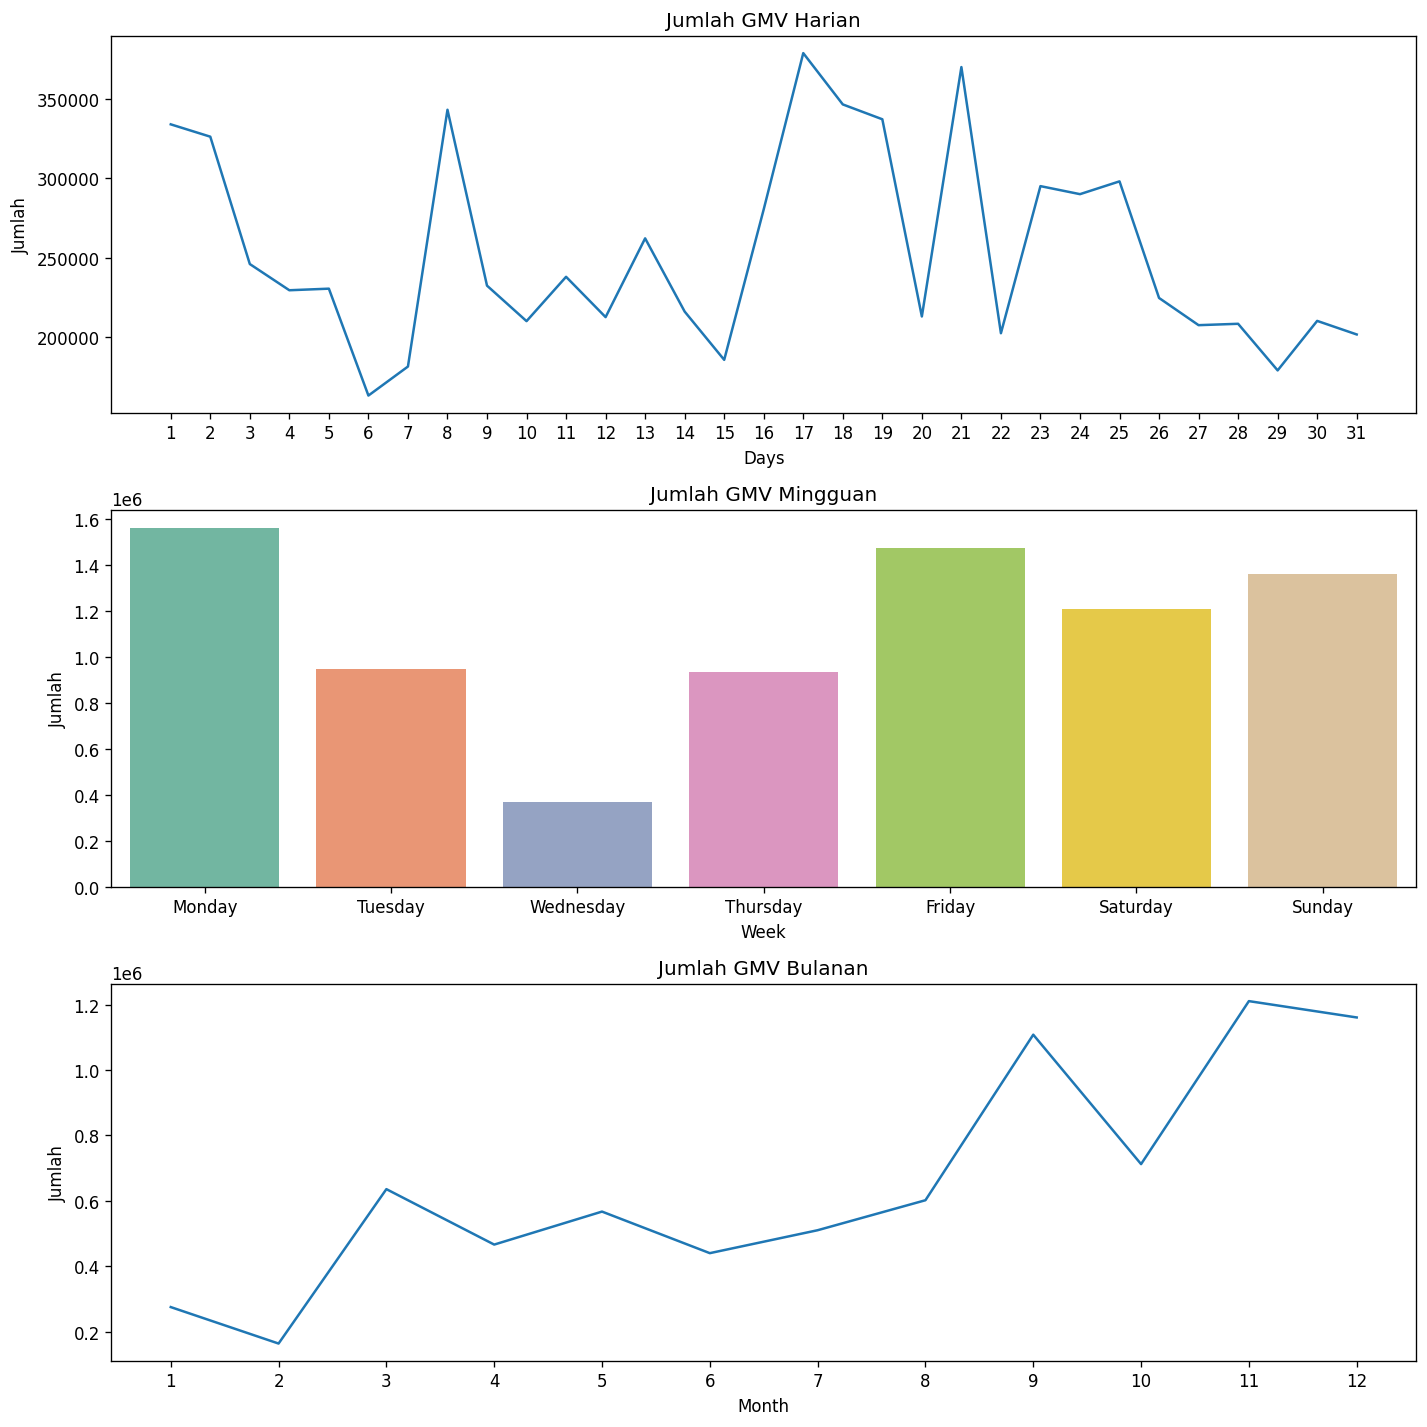

In [ ]:
# daily
Daily_GMV = df.groupby("Day_OrderDate", as_index=False)["GMV"].sum()

# weekly
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Weekly_GMV = df.groupby("Week_OrderDate", as_index=False)["GMV"].sum()

# monthly
Monthly_GMV = df.groupby("Month_OrderDate", as_index=False)["GMV"].sum()

plt.figure(figsize = (12,12))
plt.subplot (3,1,1)
sns.lineplot(data=Daily_GMV, x="Day_OrderDate",y="GMV").set_title("Jumlah GMV Harian")
plt.xticks([i for i in np.arange(1,32)])
plt.xlabel("Days")
plt.ylabel("Jumlah")

plt.subplot (3,1,2)
sns.barplot(data=Weekly_GMV, x="Week_OrderDate",y="GMV", palette="Set2",order=order).set_title("Jumlah GMV Mingguan")
plt.xlabel("Week")
plt.ylabel("Jumlah")

plt.subplot (3,1,3)
sns.lineplot(data=Monthly_GMV, x="Month_OrderDate",y="GMV").set_title("Jumlah GMV Bulanan")
plt.xticks([i for i in np.arange(1,13)])
plt.xlabel("Month")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa:
- Jumlah GMV harian, mengalami penurunan pada tanggal 1-6, kemudian mengalami peningkatan pada tanggal 7 dan 8 secara tajam. Setelah itu, data mengalami fluktuasi dengan variansi yang berbeda-beda. GMV tertinggi terdapat pada tanggal 17 serta 21. Kemudian, jumlah GMV menurun secara perlahan pada akhir bulan yaitu pada tanggal 25-31. Hal ini bisa jadi disebabkan karena pada akhir bulan, gaji pembeli sudah berkurang sehingga mengalami penurunan jumlah transaksi. Tapi, pada awal bulan karena baru gajian sehingga jumlah GMV cenderung meningkat.
- Jumlah GMV mingguan, mengalami penurunan jumlah GMV pada hari Selasa, Rabu, dan Kamis. Selain itu, mengalami peningkatan kembali pada hari Jumat. Hal ini dikarenakan pada hari Selasa, Rabu, dan Kamis merupakan hari kerja, sehingga bisa jadi para pembeli tidak sempat melakukan GMV. Sedangkan hari Jumat merupakan hari menuju weekend sehingga mengalami peningkatan jumlah transaksi.
- Jumlah GMV bulanan, mengalami peningkatan seiring berjalannya bulan. Pada akhir tahun, terjadi peningkatan jumlah GMV secara besar-besaran. Hal ini dikarenakan pada akhir tahun biasanya terdapat cuci gudang sehingga banyak barang diskon. Selain itu, pada akhir tahun terdapat beberapa event seperti Halloween serta Natal

Secara umum, hasil grafik pada jumlah GMV mirip dengan grafik jumlah pembeli serta jumlah transaksi. Tetapi terdapat beberapa perbedaan pada grafik harian. Hal ini dikarenakan pada variabel yang dihitung pada GMV adalah pendapatan yang juga memperhitungkan diskon. Berbeda dengan jumlah pembeli serta jumlah transaksi yang tidak memperhitungkan value barang yang dibeli akan memasok berapa rupiah pada perusahaan. Walaupun perhitungan GMV bukan merupakan reprensentasi pendapatan bersih untuk perusahaan.

### **PROFIT**

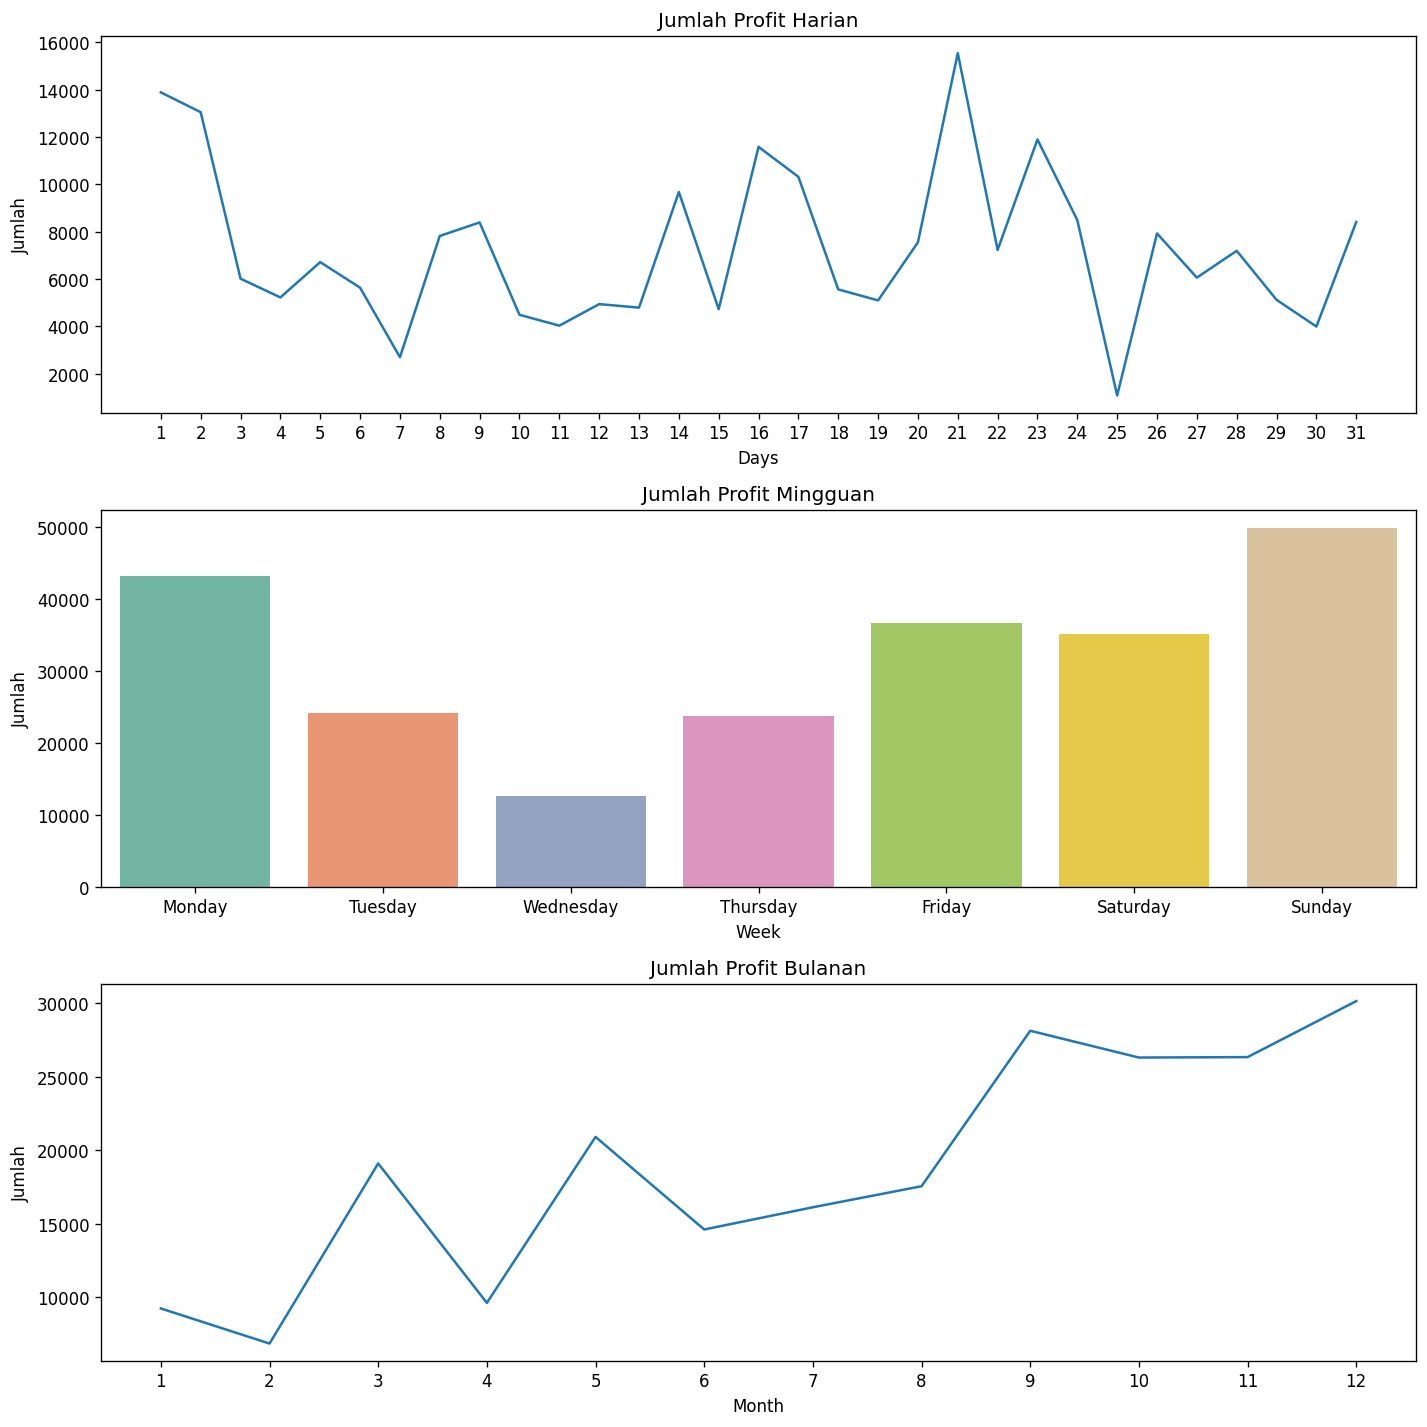

In [ ]:
# daily
Daily_Profit = df.groupby("Day_OrderDate", as_index=False)["Profit"].sum()

# weekly
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Weekly_Profit = df.groupby("Week_OrderDate", as_index=False)["Profit"].sum()

# monthly
Monthly_Profit = df.groupby("Month_OrderDate", as_index=False)["Profit"].sum()

plt.figure(figsize = (12,12))
plt.subplot (3,1,1)
sns.lineplot(data=Daily_Profit, x="Day_OrderDate",y="Profit").set_title("Jumlah Profit Harian")
plt.xticks([i for i in np.arange(1,32)])
plt.xlabel("Days")
plt.ylabel("Jumlah")

plt.subplot (3,1,2)
sns.barplot(data=Weekly_Profit, x="Week_OrderDate",y="Profit", palette="Set2",order=order).set_title("Jumlah Profit Mingguan")
plt.xlabel("Week")
plt.ylabel("Jumlah")

plt.subplot (3,1,3)
sns.lineplot(data=Monthly_Profit, x="Month_OrderDate",y="Profit").set_title("Jumlah Profit Bulanan")
plt.xticks([i for i in np.arange(1,13)])
plt.xlabel("Month")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa:
- Jumlah profit harian, mengalami penurunan pada tanggal 1-4. Setelah itu, data mengalami fluktuasi dengan variansi yang berbeda-beda. Profit tertinggi terdapat pada tanggal 21. Kemudian, jumlah profit menurun drastis pada tanggal 25. 
- Jumlah profit mingguan, mengalami penurunan jumlah profit pada hari Selasa, Rabu, dan Kamis. Profit tertinggi terjadi pada hari Minggu.
- Jumlah profit bulanan, mengalami peningkatan seiring berjalannya bulan. Pada akhir tahun, terjadi peningkatan jumlah profit secara besar-besaran. Hal ini dikarenakan pada akhir tahun terdapat beberapa event seperti Halloween serta Natal


Secara umum, hasil grafik pada jumlah profit mirip dengan grafik jumlah pembeli, jumlah transaksi, serta GMV. Tetapi terdapat beberapa perbedaan pada grafik harian. Sehingga, dapat disimpulkan bahwa jumlah pembeli, transaksi, serta GMV yang banyak belum tentu berhubungan dengan peningkatan jumlah profit. Hal ini disebabkan karena apabila barang yang dijual kebanyakan merupakan barang diskon, akan menyebabkan penurunan profit dibandingkan dengan penjualan barang dengan harga normal. 

## **2. Monthly Retention**

In [ ]:
# get the first day a customer was active
start_date = df.groupby("Customer ID")["Order Date"].min()
start_date = start_date.rename("start day")
start_date.head()

Customer ID
AA-10315   2014-03-31
AA-10375   2014-04-21
AA-10480   2014-05-04
AA-10645   2014-06-22
AB-10015   2014-03-07
Name: start day, dtype: datetime64[ns]

In [ ]:
# join start date
df = pd.merge(df, start_date, left_on="Customer ID", right_index=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Month_OrderDate,Week_OrderDate,Day_OrderDate,GMV,start day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,11,Tuesday,8,523.9200,2015-10-15
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,11,Tuesday,8,2195.8200,2015-10-15
5491,5492,CA-2017-164098,2017-01-26,2017-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,"SimpliFile Personal File, Black Granite, 15w x...",18.160,2,0.2,1.8160,1,Thursday,26,29.0560,2015-10-15
6877,6878,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,C-Line Cubicle Keepers Polyproplyene Holder w/...,131.376,6,0.6,-95.2476,10,Thursday,15,315.3024,2015-10-15
6878,6879,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,Xerox 1986,5.344,1,0.2,1.8704,10,Thursday,15,4.2752,2015-10-15


In [ ]:
df["days_since_start"] = (df["Order Date"] - df["start day"]).dt.days
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Month_OrderDate,Week_OrderDate,Day_OrderDate,GMV,start day,days_since_start
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.960,2,0.0,41.9136,11,Tuesday,8,523.9200,2015-10-15,390
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.940,3,0.0,219.5820,11,Tuesday,8,2195.8200,2015-10-15,390
5491,5492,CA-2017-164098,2017-01-26,2017-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,18.160,2,0.2,1.8160,1,Thursday,26,29.0560,2015-10-15,469
6877,6878,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,131.376,6,0.6,-95.2476,10,Thursday,15,315.3024,2015-10-15,0
6878,6879,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,5.344,1,0.2,1.8704,10,Thursday,15,4.2752,2015-10-15,0


In [ ]:
# extract start month
df["start_month"] = df["start day"].values.astype("datetime64[M]")

# get the number of months since the customer started
df["months_since_start"] = np.floor((df["Order Date"] - df["start_month"]) / np.timedelta64(1,"M"))

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Discount,Profit,Month_OrderDate,Week_OrderDate,Day_OrderDate,GMV,start day,days_since_start,start_month,months_since_start
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.0,41.9136,11,Tuesday,8,523.9200,2015-10-15,390,2015-10-01,13.0
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.0,219.5820,11,Tuesday,8,2195.8200,2015-10-15,390,2015-10-01,13.0
5491,5492,CA-2017-164098,2017-01-26,2017-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,0.2,1.8160,1,Thursday,26,29.0560,2015-10-15,469,2015-10-01,15.0
6877,6878,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,0.6,-95.2476,10,Thursday,15,315.3024,2015-10-15,0,2015-10-01,0.0
6878,6879,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,0.2,1.8704,10,Thursday,15,4.2752,2015-10-15,0,2015-10-01,0.0


In [ ]:
df[["Customer ID", "days_since_start"]].head()

,Customer ID,days_since_start
0,CG-12520,390
1,CG-12520,390
5491,CG-12520,469
6877,CG-12520,0
6878,CG-12520,0


In [ ]:
df.groupby("days_since_start")["Customer ID"].nunique().head()

days_since_start
0    784
1      3
2      3
4      2
5      1
Name: Customer ID, dtype: int64

In [ ]:
df.groupby("days_since_start")["Customer ID"].nunique().head() / df["Customer ID"].nunique()

days_since_start
0    1.000000
1    0.003827
2    0.003827
4    0.002551
5    0.001276
Name: Customer ID, dtype: float64

TypeError: ignored

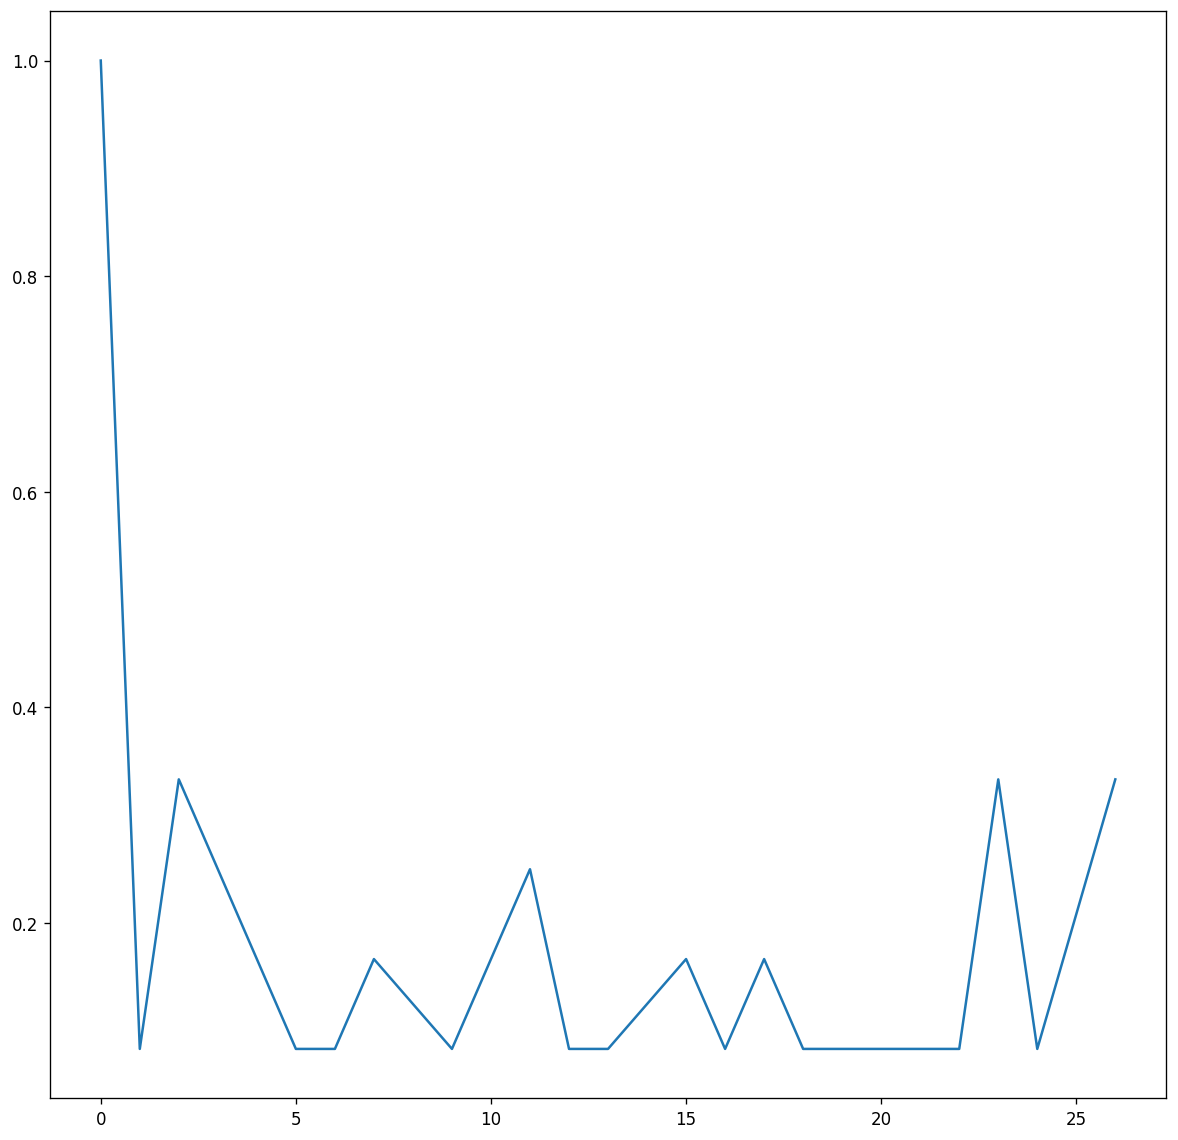

In [ ]:
# plotting
plt.figure(figsize=(12,12))

# looping for each start month
for i, month in enumerate(df["start_month"].unique()):
  # for each month, create a cohort df (dfc) that is filtered just for that month
  dfc = df[df["start_month"]==pd.to_datetime(month)]

  # then get the retention corhorts for that start month
  retention_cohort = dfc.groupby("months_since_start")["Customer ID"].nunique() / dfc["Customer ID"].nunique()

  # plot out the corhort
  p = plt.plot(retention_cohort)
  
  # legend
  plt.text(s=pd.to_datetime(month).strftime("%B %Y"))
  plt.text(s="Cohort Month:")
  plt.title("Monthly Customer Retention")

Berdasarkan grafik diatas, terdapat penurunan retention customer dari bulan ke bulan. Namun, pada bulan ke-25, terjadi peningkatan customer retention hingga hampir mencapai 40%.

Bisnis yang menaikkan customer retention rate sejumlah 5% saja, dapat meningkatkan profit mereka dari 5% sampai 95%. Beberapa hal yang dapat menyebabkan angka customer retain yang baik adalah memiliki produk atau layanan yang berkualitas, memperhatikan feedback dari customer, serta menunjukkan apresiasi kepada customer yang selama ini sudah memilih perusahaan tersebut.

## **3. Identifikasi produk yang membawa profit terbesar dalam 3 bulan terakhir**

In [ ]:
# look at the max order date
df["Order Date"].max()

Timestamp('2017-12-30 00:00:00')

In [ ]:
# last three month
product_3m = df[(df["Order Date"]>="2017-10-01 00:00:00") & (df["Order Date"]<="2017-12-30 00:00:00")].copy()

In [ ]:
# make grouping by the product
product_3m.groupby(["Product Name"]).sum().sort_values("Profit", ascending=False)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Month_OrderDate,Day_OrderDate,GMV,days_since_start,months_since_start
Product Name,,,,,,,,,,,
Canon imageCLASS 2200 Advanced Copier,6815,29735,21699.938,7,0.2,8959.9744,21,39,67339.8076,2533,83.0
"3D Systems Cube Printer, 2nd Generation, Magenta",6341,10035,5199.960,4,0.0,1351.9896,10,5,20799.8400,1073,36.0
Adjustable Depth Letter/Legal Cart,14368,186607,4028.412,23,0.2,1065.1702,56,70,22726.0504,5965,196.0
Hewlett Packard LaserJet 3310 Copier,4620,90049,2879.952,6,0.2,1007.9832,12,24,13823.7696,1136,37.0
GBC DocuBind TL300 Electric Binding System,1897,55407,1793.980,2,0.0,843.1706,10,3,3587.9600,1068,36.0
...,...,...,...,...,...,...,...,...,...,...,...
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,5321,37918,2314.116,7,0.4,-1002.7836,10,2,9719.2872,1225,41.0
GBC DocuBind P400 Electric Binding System,2929,27217,1633.188,4,0.7,-1306.5504,10,19,1959.8256,1293,42.0
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,5311,77095,1525.188,6,0.8,-2287.7820,11,19,1830.2256,1296,42.0


Produk yang menjadi profit terbesar selama tiga bulan terakhir adalah Canon imageCLASS 2200 Advanced Copier. 

## **4. Model Forecasting untuk Memprediksi Jumlah Visitor dan Jumlah Transaksi dalam 1 Bulan Kedepan**

In [ ]:
!pip install sktime[all_extras]

In [ ]:
# utilities packages
import datetime

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.stats.diagnostic import acorr_ljungbox

# load sktime for time series forecasting
from sktime.utils.plotting import plot_series # from plotting
from sktime.forecasting.naive import NaiveForecaster # for naive forecasting
from sktime.forecasting.arima import AutoARIMA # for automated ARIMA forecasting
from sktime.forecasting.exp_smoothing import ExponentialSmoothing # for exponential smoothing forecasting
from sktime.forecasting.ets import AutoETS # for automated ETS forecasting 
from sktime.forecasting.tbats import TBATS # for TBATS forecasting
from sktime.forecasting.fbprophet import Prophet # for Prophet forecasting
from sktime.forecasting.base import ForecastingHorizon # for creating forecast horizon
from sktime.forecasting.model_selection import (
    temporal_train_test_split, 
    ExpandingWindowSplitter, 
    SlidingWindowSplitter
) # for train-test split and cross validation
from sktime.performance_metrics.forecasting import (
    mean_absolute_error, 
    mean_squared_error, 
    mean_absolute_percentage_error
) # for evaluation metrics
from sktime.forecasting.model_evaluation import evaluate # for evaluating CV results

%matplotlib inline

In [ ]:
# change data type
de = data_ecommerce 
de["Order Date"] = pd.to_datetime(de["Order Date"])
de["Ship Date"] = pd.to_datetime(de["Ship Date"])

de.info()

### **Jumlah Transaksi**

In [ ]:
# set the date as index
de = de.set_index("Order Date")

de = de["2017-12-01 00:00:00":"2017-12-30 00:00:00"].resample("D").sum()
de.head()

In [ ]:
import warnings
import matplotlib.pyplot as plt
y = de["Quantity"]
fig, ax= plt.subplots(figsize=(20,6))
ax.plot(y,marker=".", linestyle="-", linewidth=0.5, label="Daily on December")
ax.plot(y.resample("M").mean(),marker="o", markersize=8, linestyle="-", label="Monthly Mean Resample")
ax.set_ylabel("Quantity")
ax.legend()